==================================================================================================================================
# <div align="center">PROJECT 03: Etsy Print-On-Demand Trends</div>
==================================================================================================================================

### 📝 BUSINESS IDEA

**Print-On-Demand (POD) Business** – What the project is about

### ⚠️ PROBLEM

No Free API exists to access the market data needed, requiring web scraping to gather insights – The challenge we’re addressing

### 🔰 SOLUTION FRAMEWORK

Web scrape etsy for a specific POD product

Collect the data necessary to clean & analyze


| **Development**                                                                                                                                             | **Presentation**                 |
| ----------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------- |
| **Business Idea** → **Problem Definition** → **Data Research & Visualization** → **Insights** → **Interpretation** → **Implications** → **Business Impact** | **Limitations & Considerations** |


---

### 📓 SECTION OVERVIEW

- **Project / Business Idea:** What the project is about

- **Problem:** The challenge we’re addressing

- **Solution / Approach:** How we solve it

- **Research & Plots:** How we analyzed data visually

- **Insights:** What we discovered

- **Interpretation:** Why it matters

- **Implications:** What actions the business can take

- **Business Impact:** Expected results for the business

- **Limitations:** What constraints or gaps exist

==================================================================================================================================
# <div align="center">RESEARCH</div>
==================================================================================================================================

### 🌐 **Which Are the Best-Selling POD Products on Etsy?**

I’m researching print-on-demand products to sell on Etsy that only require **digital artwork and marketing**, while the POD provider handles **printing, packaging, and shipping**.


### ⭐ **Using Google Trends for POD Product Research**
💡 **Goal:** Identify which POD product category has been searched the most on Google over the past 5 years (2020–2025).

Below is the list of product categories I’m comparing:

### 🎯 **Chosen POD product to research is :** `tote bags`

| Category              | Subcategories / Examples                                      |
|-----------------------|---------------------------------------------------------------|
| **Custom Apparel**        | T-shirts, Hoodies, Sweatshirts, Tank tops                     |
| **Mug**                   | Ceramic mugs, Color-changing mugs, Espresso mugs, Travel mugs |
| **Tote Bag**              | Cotton totes, All-over print totes                            |
| **Phone Case**            | iPhone / Samsung cases, Tough / Slim cases                    |
| **Stickers**              | Die-cut stickers, Kiss-cut stickers, Sticker sheets           |
| **Hats**                  | Baseball caps, Trucker hats, Beanies                          |
| **Pillows / Cushions**    | Pillow covers, Stuffed pillows, All-over print pillow designs|
| **Blanket**               | Fleece blankets, Sherpa blankets, Woven blankets             |
| **Wall Art**              | Posters, Canvas prints, Framed posters, Metal prints         |
| **Doormat**               | Printed coir doormats, Rubber-backed doormats                |
| **Drinkware**             | Stainless steel tumblers, Water bottles, Wine tumblers       |
| **Calendar**              | Custom printed wall calendars                                 |
| **Yoga Mat**              | Printed yoga mats                                             |
| **Bedding**               | Duvet covers, Pillowcases, All-over print bed sets           |
| **Pet Accessories**       | Pet bandanas, Pet beds, Pet bowls, Pet blankets              |
| **Ornaments**             | Ceramic ornaments, Wood ornaments, Metal ornaments           |


### **BEFORE GETTING STARTED :**

```Etsy``` is a dynamic website, so scraping it requires careful handling.

Since ```Etsy``` uses ```JavaScript``` to load some content,

```requests``` +  ``BeautifulSoup`` might work for static parts (like search results), 

but for dynamic content, ``Selenium`` is more reliable. 

I will be using ``requests`` + ``BeautifulSoup`` for ```product listings``` **(title, price, link)**

Important Note: Etsy uses dynamic loading + anti-bot protections.

Using code with standard HTML scraping can work as long as Etsy doesn’t block the request.

If blocked, using headers, rotating proxies, or the Etsy API will be required.

==================================================================================================================================
# <div align="center">WEB SCRAPING</div>
==================================================================================================================================

### 🧐 QUESTIONS

- Which keywords in product titles and descriptions drive the most sales?

- What keywords improve search visibility on Etsy?

- Which product niches have the highest demand?

- When is the best period to sell based on review trends?

- Which price ranges generate the most sales?

- Which country's customers are buying the most of this product?

----

### 🧰 **Install for web scraping**

In [ ]:
# install requests & beautifulsoup
!pip install requests beautifulsoup4 fake-useragent pandas

# install selenium
!pip install selenium pandas

---

### 📌 **Avoid web BLOCKED**
| Version                                   | Best For          | Pros                                           | Cons                          |
| ----------------------------------------- | ----------------- | ---------------------------------------------- | ----------------------------- |
| **Requests + BeautifulSoup + Pagination** | Simple scraping   | Fast, clean                                    | Etsy may block request        |
| **Selenium + BeautifulSoup + Pagination** | Reliable scraping | Bypasses bot protection, loads dynamic content | Slower, requires ChromeDriver |


### GOOGLE TRENDS

In [ ]:
!pip install pytrends


AttributeError: module 'pytrends' has no attribute '__version__'

c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


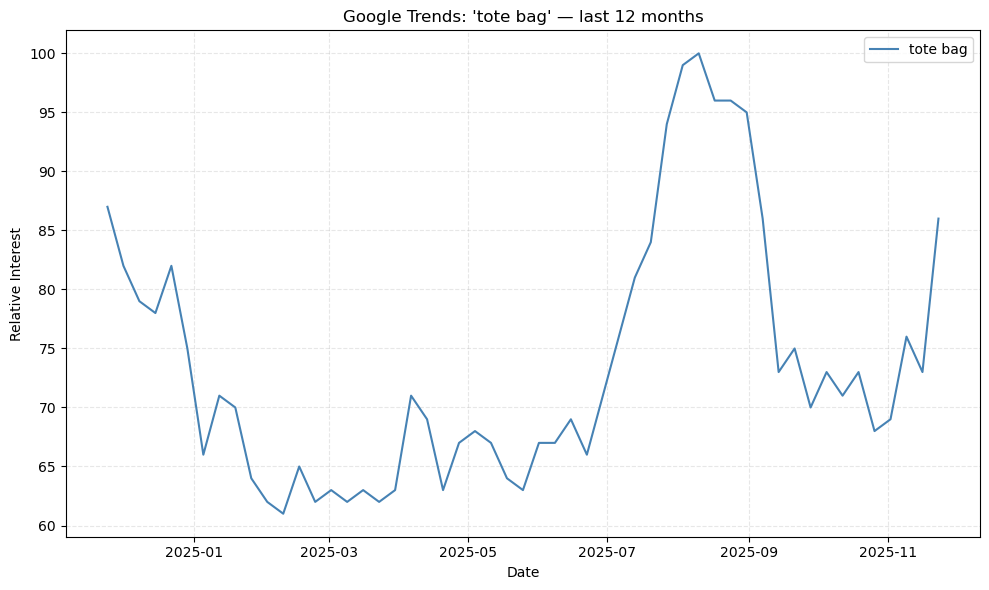

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_google_trends(keyword, timeframe='today 12-m', geo=''):
    """
    Fetch Google Trends 'interest over time' data using the unofficial JSON API.
    :param keyword: string, search term
    :param timeframe: string, e.g. 'today 12-m' for last 12 months
    :param geo: string, country code, '' for worldwide
    :return: pandas DataFrame with date and interest
    """
    url = 'https://trends.google.com/trends/api/widgetdata/multiline/csv'
    session = requests.Session()
    
    # Step 1: get token
    explore_url = 'https://trends.google.com/trends/explore'
    params = {
        'q': keyword,
        'date': timeframe,
        'geo': geo,
        'hl': 'en-US',
    }
    r = session.get(explore_url, params=params)
    
    # Step 2: build payload (simplified)
    pytrends_payload = {
        'comparisonItem': [{'keyword': keyword, 'geo': geo, 'time': timeframe}],
        'category': 0,
        'property': ''
    }
    
    # Step 3: Use pytrends library if installed, or fallback to requests
    try:
        from pytrends.request import TrendReq
        pytrend = TrendReq(hl='en-US', tz=360)
        pytrend.build_payload([keyword], timeframe=timeframe, geo=geo)
        df = pytrend.interest_over_time()
        if 'isPartial' in df.columns:
            df = df.drop(columns=['isPartial'])
        return df
    except ImportError:
        print("Pytrends not installed. Using CSV download from Trends (may be limited).")
        print("For full functionality, install pytrends: pip install pytrends")
        return None

def plot_trend(df, keyword):
    plt.figure(figsize=(10,6))
    plt.plot(df.index, df[keyword], label=keyword, color='steelblue')
    plt.title(f"Google Trends: '{keyword}' — last 12 months")
    plt.xlabel('Date')
    plt.ylabel('Relative Interest')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    keyword = "tote bag"
    df = fetch_google_trends(keyword)
    if df is not None:
        plot_trend(df, keyword)


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


            tote bag  isPartial
date                           
2024-12-29        75      False
2025-01-05        66      False
2025-01-12        71      False
2025-01-19        70      False
2025-01-26        64      False
            tote bag  isPartial
date                           
2025-10-26        68      False
2025-11-02        69      False
2025-11-09        76      False
2025-11-16        73      False
2025-11-23        86       True


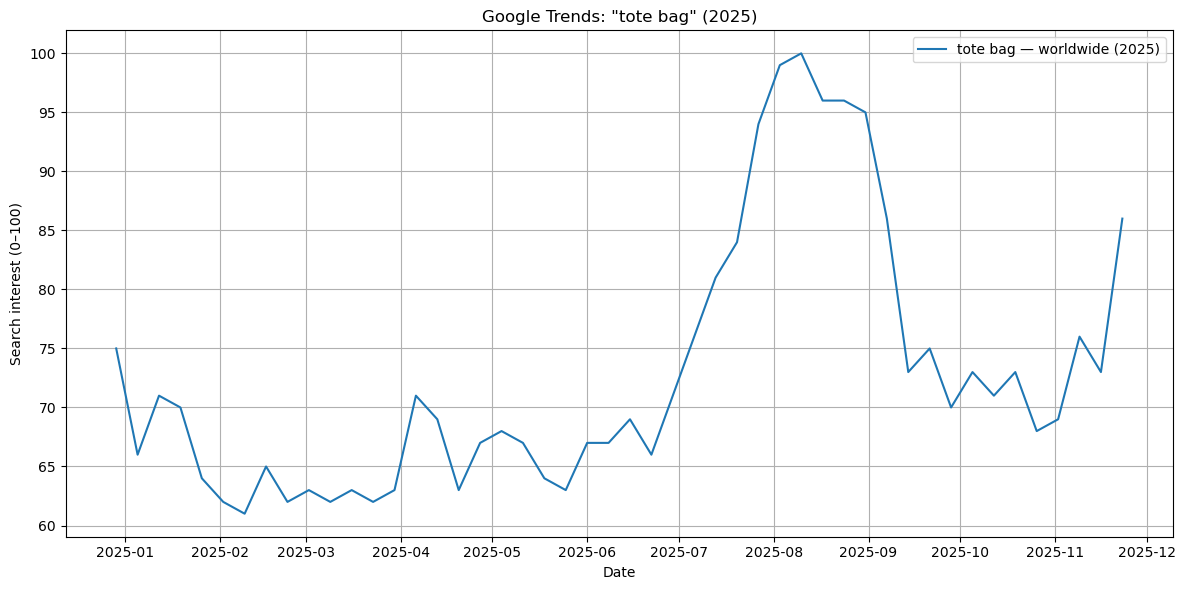

In [14]:
# Install the library first, if you haven't
# pip install pytrends pandas matplotlib

from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# 1. connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. set your keyword(s) and timeframe (here: 2025)
kw = ["tote bag"]
pytrends.build_payload(kw_list=kw,
                       timeframe="2025-01-01 2025-12-31",
                       geo="",     # empty = Worldwide
                       gprop="")   # web search

# 3. fetch interest over time
df = pytrends.interest_over_time()

print(df.head())
print(df.tail())

# 4. plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df["tote bag"], label="tote bag — worldwide (2025)")
plt.xlabel("Date")
plt.ylabel("Search interest (0–100)")
plt.title('Google Trends: "tote bag" (2025)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Install the libraries first:
# pip install pytrends pandas plotly

from pytrends.request import TrendReq
import pandas as pd
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set your keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()  # make date a column

# 4. Aggregate monthly (mean for each month)
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()  # convert back to timestamp for Plotly

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})
fig.update_traces(marker=dict(size=10, color='red'), line=dict(color='blue'))
fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [22]:
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# Force y-axis to start at 0
fig.update_yaxes(range=[0, monthly_df['tote bag'].max() + 10])  # add a bit of space on top
fig.update_traces(marker=dict(size=10, color='green'), line=dict(color='green'))
fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [25]:
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# 6. Customize colors and layout
fig.update_traces(marker=dict(size=10, color='#c7ed2e'), line=dict(color='#c7ed2e', width=3))
fig.update_layout(
    plot_bgcolor='white',  # white background
    paper_bgcolor='white', # white surrounding
    xaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray', zeroline=False, range=[0, monthly_df['tote bag'].max() + 10]),
    title=dict(font=dict(size=20))
)

fig.show()
fig.write_html("tote_bag_trends.html", include_plotlyjs='cdn', full_html=True)



c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [26]:
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="2025-01-01 2025-12-31", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (2025)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# 6. Customize colors, line thickness, and layout
fig.update_traces(marker=dict(size=10, color='#c7ed2e'),
                  line=dict(color='#c7ed2e', width=6))  # thicker line

fig.update_layout(
    plot_bgcolor='white',      # white plot background
    paper_bgcolor='white',     # white surrounding
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False,
               range=[0, monthly_df['tote bag'].max() + 10]),
    title=dict(font=dict(size=20)),
    margin=dict(l=40, r=40, t=80, b=40)  # remove extra padding to make it clean
)

fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [27]:
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe for the past 5 years
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="today 5-y", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Aggregate monthly
df['month'] = df['date'].dt.to_period('M')
monthly_df = df.groupby('month')[keyword].mean().reset_index()
monthly_df['month'] = monthly_df['month'].dt.to_timestamp()

# 5. Create interactive plot
fig = px.line(monthly_df, x='month', y='tote bag', markers=True,
              title='Google Trends: "tote bag" (Past 5 Years)',
              labels={'month': 'Month', 'tote bag': 'Search Interest'})

# 6. Customize colors, line thickness, and layout (black line and dots)
fig.update_traces(marker=dict(size=10, color='black'),
                  line=dict(color='black', width=6))

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False,
               range=[0, monthly_df['tote bag'].max() + 10]),
    title=dict(font=dict(size=20)),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [29]:
import pandas as pd
from pytrends.request import TrendReq
import plotly.express as px

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe for the past 5 years
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="today 5-y", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Extract month
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# 5. Order months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# 6. Create boxplot per month
fig = px.box(df, x='month', y='tote bag', points='all',  # 'all' shows all data points
             hover_data=['year', 'date'],
             title='Google Trends: "tote bag" (Past 5 Years by Month)')

# 7. Customize colors and layout
fig.update_traces(marker=dict(color='black', size=8, opacity=0.7),
                  line=dict(color='black', width=2))

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    title=dict(font=dict(size=20)),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


c:\Users\sboub\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Silence FutureWarnings

import pandas as pd
from pytrends.request import TrendReq
import plotly.graph_objects as go

# 1. Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=0)

# 2. Set keyword and timeframe for the past 5 years
keyword = ["tote bag"]
pytrends.build_payload(keyword, timeframe="today 5-y", geo="", gprop="")

# 3. Fetch interest over time
df = pytrends.interest_over_time()
df = df.reset_index()

# 4. Extract month and year
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

# 5. Order months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)

# 6. Compute monthly average across years
monthly_avg = df.groupby('month', observed=False)['tote bag'].mean().reset_index()

# 7. Create scatter + line plot
fig = go.Figure()

# Add all data points as black dots
fig.add_trace(go.Scatter(
    x=df['month'],
    y=df['tote bag'],
    mode='markers',
    marker=dict(color='black', size=8, opacity=0.7),
    name='Data Points',
    hovertext=df['year'].astype(str) + ' - ' + df['date'].dt.strftime('%Y-%m-%d')
))

# Add black line for monthly average
fig.add_trace(go.Scatter(
    x=monthly_avg['month'],
    y=monthly_avg['tote bag'],
    mode='lines+markers',
    line=dict(color='black', width=3),
    marker=dict(size=10),
    name='Monthly Average'
))

# 8. Layout customization
fig.update_layout(
    title=dict(text='Google Trends: "tote bag" (Past 5 Years by Month)', font=dict(size=20)),
    xaxis_title='Month',
    yaxis_title='Search Interest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    yaxis=dict(showline=False, showgrid=True, gridcolor='lightgray', zeroline=False),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


---

## 📌 **Product PAGE**

### ⭐ **Etsy Product Info**
| Field Name                  | Concise Definition                        |
|-----------------------------|------------------------------------------|
| **product_title**           | Product title                             |
| **product_url**             | Short URL to product listing              |
| **product_id**              | Unique product ID                         |
| **product_txt**             | Unique product TEXT                       |
| **var_extension**           | Variations(s) URL extension               |
| **var_url**                 | Full URL to a variant product             |
| **product_options**         | Available product options / eg variation0|
| **product_var**             | Variant’s selected options                |
| **var_current_price**       | Current price for variant                 |
| **var_old_price**           | Original price for variant                |
| **var_discount_percentage** | Variant discount percentage               |
| **product_rating**          | Average product rating                     |
| **txt_reviews**             | Concatenated review text                  |
| **nbr_reviews**             | Total number of reviews                   |
| **listed_date**             | Date product was first listed             |
| **product_description**     | Product's description                     |


### ⭐ **Etsy Product Info**
| Field Name             | Python Data Type       | Concise Definition                      |
|------------------------|-----------------------|----------------------------------------|
| **product_title**          | `str`                 | Product title                           | 
| **product_url**           | `str`                 | Short URL to product listing        | 
| **product_id**             | `str`                 | Unique product ID                       | 
| **product_txt**             | `str`                 | Unique product TEXT                    |
| **var_extension**          | `str`                 | Variations(s) URL extension             |
| **var_url**               | `str`                 | Full URL to a variant product                      |
| **product_options**        | `List[dict]`          | Available product options / eg variation0               |
| **product_var**            | `dict`                | Variant’s selected options              |
| **var_current_price**      | `float` or `Decimal`  | Current price for variant               |
| **var_old_price**          | `float` or `Decimal`  | Original price for variant              |
| **var_discount_percentage**| `float`               | Variant discount percentage             |
| **product_rating**         | `float`               | Average product rating                  |
| **txt_reviews**            | `str`                 | Concatenated review text                |
| **nbr_reviews**            | `int`                 | Total number of reviews                 |
| **listed_date**            | `date`                | Date product was first listed           |
| **product_description**            | `str`                | Product's description           |


The main data fields to extract from Etsy's product page :


| Field Name             | Python Data Type       | Concise Definition                      | Long Definition                                                                                       |
|------------------------|-----------------------|----------------------------------------|-------------------------------------------------------------------------------------------------------|
| **product_title**          | `str`                 | Product title                           | The full name of the product, same across all variants.                                              |
| **product_url**           | `str`                 | Short URL to product listing        | Etsy listing URL in the format `https://www.etsy.com/listing/product_id/` (e.g., "https://www.etsy.com/listing/1289965137/"). |
| **product_id**             | `str`                 | Unique product ID                       | Extracted from `product_url`; a unique identifier assigned by Etsy for each listing.               |
| **product_txt**             | `str`                 | Unique product TEXT                    | Extracted after loading the page using the `product_url`; a unique text identifier assigned by Etsy for each listing that only shows once product listing is selected.               |
| **var_extension**          | `str`                 | Variations(s) URL extension             | The variation(s) extension added to `product_url` to generate `var_url`.                        |
| **var_url**               | `str`                 | Full URL to a variant product                      | Complete link to a specific variant, formed by appending `var_extension` to `product_url`.          |
| **product_options**        | `List[dict]`          | Available product options / eg variation0               | List of all product options (size, color, material, etc.), each stored as a dictionary.             |
| **product_var**            | `dict`                | Variant’s selected options              | Dictionary representing the specific option(s) chosen for this variant.                              |
| **var_current_price**      | `float` or `Decimal`  | Current price for variant               | Price of this variant after applying any discounts.                                                  |
| **var_old_price**          | `float` or `Decimal`  | Original price for variant              | Price of this variant before any discounts were applied (if available).                              |
| **var_discount_percentage**| `float`               | Variant discount percentage             | Discount applied to this variant, calculated if both current and old prices are available.           |
| **product_rating**         | `float`               | Average product rating                  | Average rating of the product out of 5 (e.g., 4.5).                                                 |
| **txt_reviews**            | `str`                 | Concatenated review text                | All review texts or summary text for the product; may include the number of reviews in parentheses. |
| **nbr_reviews**            | `int`                 | Total number of reviews                 | Total count of reviews received by the product.                                                     |
| **listed_date**            | `date`                | Date product was first listed           | The date the product was originally published on Etsy.                                               |
| **product_description**            | `str`                | Product's description           | The text content of the description of the product.                                               |



variation0=5886526755

variation0=5886526755 & variation1=5886526755


https://www.etsy.com/listing/1716154949/boho-embroidered-floral-tote-bag-in-sage

https://www.etsy.com/listing/product_id/product_txt/product_var


product_var  ?variation0=&variation1=variation2=

---

### ⭐ **Insighted Data `product_niche` from `product_title` and `product_description`**

| Field Name                 | Python Data Type       | Concise Definition                               |
|---------------------------|-------------------------|---------------------------------------------------|
| **product_niche**             | `str`                     | Product theme or genre (comedy, anime…) based on `product_title` & `product_description`.         |

---

### ⭐ **Etsy Product Reviews (Extra dataset)**
| Field Name               | Concise Definition                                      |
|--------------------------|----------------------------------------------------------|
| **review_product_var**   | The specific product variant purchased by the reviewer   |
| **review_rating**        | The rating the customer gave the product                 |
| **review_comment**       | The text comment the customer wrote                      |
| **review_date**          | The date when the customer posted the review             |
| **review_profile_url**   | URL to the reviewer's profile page                       |
| **review_username**      | The username of the reviewer extracted from review_profile_url |
| **review_country**       | The reviewer's country/location                          |


All of the product Reviews `Comment`, `Rating`, and `Date` when each review was posted

| Field Name               | Python Data Type | Concise Definition                                      |
|--------------------------|------------------|----------------------------------------------------------|
| **review_product_var**   | `str`            | The specific product variant purchased by the reviewer   |
| **review_rating**        | `float`          | The rating the customer gave the product                 |
| **review_comment**       | `str`            | The text comment the customer wrote                      |
| **review_date**          | `date`           | The date when the customer posted the review             |
| **review_profile_url**   | `str`            | URL to the reviewer's profile page                       |
| **review_username**      | `str`            | The username of the reviewer extracted from review_profile_url |
| **review_country**       | `str`            | The reviewer's country/location                          |



---

# 📌 **CODE**

### ✅ VERSION 10

In [55]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
from decimal import Decimal, InvalidOperation
from datetime import datetime
import time
import random
import re
from urllib.parse import urlparse, unquote, quote_plus
from itertools import product

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return Decimal(s_norm)
    except (InvalidOperation, ValueError):
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

CURRENCY_MAP = {
    "$": "USD", "US$": "USD",
    "CA$": "CAD", "C$": "CAD",
    "AU$": "AUD", "A$": "AUD",
    "€": "EUR",
    "£": "GBP",
    "¥": "JPY",
    "₹": "INR",
}

def detect_currency(ld_data, soup):
    try:
        if isinstance(ld_data, dict):
            offers = ld_data.get("offers", {})
            if isinstance(offers, dict):
                iso = offers.get("priceCurrency") or offers.get("currency")
                if iso and isinstance(iso, str) and len(iso) >= 2:
                    return iso.upper()
    except:
        pass

    price_text = None
    selectors = [
        "p[data-buy-box-region='price']",
        "p[data-testid='listing-page-price']",
        "span[class*='currency-value']",
        "span[class*='wt-price']",
    ]
    for sel in selectors:
        tag = soup.select_one(sel)
        if tag and tag.get_text(strip=True):
            price_text = tag.get_text(" ", strip=True)
            break
    if not price_text:
        candidate = soup.find(text=re.compile(r'[\$\€\£\¥\₹]'))
        if candidate:
            price_text = candidate.strip()
    if price_text:
        for sym in sorted(CURRENCY_MAP.keys(), key=len, reverse=True):
            if sym in price_text:
                return CURRENCY_MAP[sym]
        m = re.search(r'([$\€\£\¥\₹])', price_text)
        if m:
            return CURRENCY_MAP.get(m.group(1), None)
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_txt_from_url(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")

    if path_parts and path_parts[0] in ["fr", "de", "es", "it", "nl"]:
        path_parts = path_parts[1:]

    product_id = ""
    product_txt = ""

    if len(path_parts) >= 2 and path_parts[0] == "listing":
        product_id = path_parts[1]
        if len(path_parts) >= 3:
            product_txt = unquote(path_parts[2])

    return product_id, product_txt

# --------------------------
# Extract price from variant URL
# --------------------------
def extract_variant_price(variant_url):
    driver.get(variant_url)
    time.sleep(random.uniform(1.5, 2.5))

    soup = BeautifulSoup(driver.page_source, "html.parser")

    current_price = None
    old_price = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))

        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if current_price and old_price:
        try:
            discount = float(((old_price - current_price) / old_price) * 100)
        except:
            discount = None
    else:
        discount = None

    return (
        float(current_price) if current_price else None,
        float(old_price) if old_price else None,
        int(round(discount)) if discount else None
    )

# --------------------------
# Etsy product extractor (with fixed variation_title)
# --------------------------
def extract_etsy_product(product_url):
    product_id, product_txt = extract_product_txt_from_url(product_url)
    product_url_full = f"https://www.etsy.com/listing/{product_id}/{product_txt}" if product_txt else f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url_full)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )

    soup = BeautifulSoup(driver.page_source, "html.parser")

    ld_data = {}
    json_ld_tag = soup.find("script", type="application/ld+json")
    if json_ld_tag:
        try:
            ld_data = json.loads(json_ld_tag.string.strip())
        except:
            ld_data = {}

    product_title = (ld_data.get("name") if isinstance(ld_data, dict) else "") or ""
    product_description = (ld_data.get("description") if isinstance(ld_data, dict) else "") or ""

    current_price = None
    old_price = None
    var_discount_percentage = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if old_price and current_price:
        try:
            var_discount_percentage = int(round(float(((old_price - current_price) / old_price) * 100)))
        except:
            var_discount_percentage = None

    currency_iso = detect_currency(ld_data, soup)

    # --------------------------
    # VARIANT EXTRACTION
    # --------------------------
    product_options = []
    try:
        variants_script = soup.find("script", {"id": "listing-page-data"})
        if variants_script:
            j = json.loads(variants_script.string)
            variations = j.get("listing", {}).get("variations", [])
            for v in variations:
                prop_name = v.get("property_name") or v.get("name") or ""
                opts = []
                for o in v.get("options", []):
                    opt_id = str(o.get("option_id") or o.get("value") or o.get("id") or "")
                    opt_label = str(
                        o.get("listing_option_display_name")
                        or o.get("label")
                        or o.get("value")
                        or o.get("name")
                        or ""
                    )
                    if opt_label == "":
                        continue
                    opts.append({"id": opt_id or opt_label, "label": opt_label})
                if prop_name:
                    product_options.append({"variation_title": prop_name, "options": opts})

        # fallback HTML <select> if JSON fails
        if not product_options:
            variation_blocks = soup.select("div[data-selector='listing-page-variation']")
            for idx, block in enumerate(variation_blocks):
                label_tag = block.select_one("label span[data-label]")
                variation_title = label_tag.get_text(strip=True) if label_tag else f"variation_{idx}"
                select_tag = block.select_one("select")
                if not select_tag:
                    continue
                options = []
                for opt in select_tag.find_all("option"):
                    val = opt.get("value", "").strip()
                    txt = opt.get_text(strip=True)
                    if not val:
                        continue
                    options.append({"id": val, "label": txt})
                if options:
                    product_options.append({
                        "variation_title": variation_title,
                        "variation_order": f"variation_{idx}",
                        "options": options
                    })
    except Exception as e:
        print(f"Error extracting variations: {e}")

    # Ratings
    try:
        rating_div = soup.find("div", class_="reviews-header appears-ready")
        if rating_div:
            txt_reviews_el = rating_div.find("h2", class_="review-header-text wt-mt-xs-2 wt-mt-lg-0")
            txt_reviews = txt_reviews_el.text.strip() if txt_reviews_el else ""
            nbr_reviews = extract_nbr_reviews(txt_reviews)
            rating_value_tag = rating_div.find("span", class_="wt-text-heading-large")
            product_rating = float(rating_value_tag.text.strip()) if rating_value_tag else 0
        else:
            txt_reviews = ""
            nbr_reviews = 0
            product_rating = 0
    except:
        txt_reviews = ""
        nbr_reviews = 0
        product_rating = 0

    # Listed date
    try:
        date_meta = soup.find("meta", {"property": "og:updated_time"})
        if date_meta and date_meta.get("content"):
            listed_date = datetime.strptime(date_meta["content"], "%Y-%m-%dT%H:%M:%S%z").date()
        else:
            listed_date = None
    except:
        listed_date = None

    return {
        "product_title": product_title,
        "product_url": f"https://www.etsy.com/listing/{product_id}/",
        "product_url_full": product_url_full,
        "product_id": product_id,
        "product_txt": product_txt,
        "product_options": product_options,
        "var_current_price": float(current_price) if current_price else None,
        "var_old_price": float(old_price) if old_price else None,
        "var_discount_percentage": var_discount_percentage,
        "currency": currency_iso,
        "product_rating": product_rating,
        "txt_reviews": txt_reviews,
        "nbr_reviews": nbr_reviews,
        "listed_date": listed_date,
        "product_description": product_description
    }

# -----------------------------------------------------------
# Variant expansion with proper variation_title
# -----------------------------------------------------------
def expand_product_variants(product_data):
    product_id = product_data.get("product_id") or ""
    product_txt = product_data.get("product_txt") or ""
    base_url = f"https://www.etsy.com/listing/{product_id}/"
    product_options = product_data.get("product_options") or []

    if not product_options:
        row = dict(product_data)
        variant_url = product_data.get("product_url_full") or base_url
        vcurr, vold, vdisc = extract_variant_price(variant_url)
        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc
        return [row]

    option_lists = []
    variation_titles = []
    for v in product_options:
        opts_clean = []
        for o in v.get("options", []):
            oid = str(o.get("id") or "").strip()
            label = str(o.get("label") or "").strip()
            if oid == "":
                oid = label
            opts_clean.append({"id": oid, "label": label})
        option_lists.append(opts_clean)
        variation_titles.append(v.get("variation_title") or f"variation_{len(variation_titles)+1}")

    expanded_rows = []
    for combo in product(*option_lists):
        row = dict(product_data)
        for i, opt in enumerate(combo):
            var_title = variation_titles[i]
            row[f"{var_title}_id"] = opt.get("id")
            row[f"{var_title}_label"] = opt.get("label")
        query_str = "&".join([f"variation{i}={quote_plus(str(opt.get('id')))}" for i, opt in enumerate(combo)])
        variant_url = f"{base_url}?{query_str}"
        vcurr, vold, vdisc = extract_variant_price(variant_url)
        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc
        expanded_rows.append(row)

    return expanded_rows

# --------------------------
# Scrape best-selling products with pagination
# --------------------------
def scrape_best_selling_products_paginated(product_limit=50):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    product_urls = []
    visited_urls = set()
    page = 1

    while len(product_urls) < product_limit:
        driver.get(base_url.format(page))
        time.sleep(random.uniform(3,5))

        product_elements = driver.find_elements(By.XPATH, "//a[contains(@href,'/listing/')]")
        for elem in product_elements:
            url = elem.get_attribute("href").split("?")[0]
            if url not in visited_urls:
                visited_urls.add(url)
                product_urls.append(url)
            if len(product_urls) >= product_limit:
                break

        if not product_elements:
            break
        page += 1

    print(f"Collected {len(product_urls)} product URLs.")

    all_products = []
    for idx, url in enumerate(product_urls, start=1):
        try:
            print(f"Scraping {idx}/{len(product_urls)}: {url}")
            data = extract_etsy_product(url)
            expanded_rows = expand_product_variants(data)
            all_products.extend(expanded_rows)
        except Exception as e:
            print(f"Error scraping {url}: {e}")
        time.sleep(random.uniform(2,4))

    return all_products

# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 1
    all_products = scrape_best_selling_products_paginated(product_limit=product_limit)
    df = pd.DataFrame(all_products)
    df.to_csv("../data/interim/10_raw_data.csv", index=False)
    print("Scraping finished!")
df.head()


Collected 1 product URLs.
Scraping 1/1: https://www.etsy.com/fr/listing/4392351544/sac-cabas-en-velours-cotele-personnalise
Scraping finished!


,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_rating,txt_reviews,nbr_reviews,listed_date,product_description,Couleur du sac_id,Couleur du sac_label,Couleur du texte_id,Couleur du texte_label,product_variant_url
0,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312994,"White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
1,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5940019035,"Ivory White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
2,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312998,"Light Pink (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
3,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313000,"Baby Blue (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
4,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313002,"Mint Green (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...


In [56]:
df.shape

(78, 20)

### LOAD CSV

In [ ]:
import pandas as pd

# Load RAW DATA CSV
df_url = 'https://drive.google.com/uc?export=download&id=12X7fJYroQWovBLaFeBP-fZAd7gbsNv76'
df_products = pd.read_csv(df_url)

print("STEP 1 : RAW CSV loaded successfully!")
df_products.head(10)

In [97]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1Xy6CkgY7H7P_S282Gxr7Dc5-NNL5w_WW"

df_v10 = pd.read_csv(url)

df_v10.head()

,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_rating,txt_reviews,nbr_reviews,listed_date,product_description,Couleur du sac_id,Couleur du sac_label,Couleur du texte_id,Couleur du texte_label,product_variant_url
0,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5,Avis sur cet article (1),1,NaN,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312994,"White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
1,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5,Avis sur cet article (1),1,NaN,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5940019035,"Ivory White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
2,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5,Avis sur cet article (1),1,NaN,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312998,"Light Pink (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
3,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5,Avis sur cet article (1),1,NaN,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313000,"Baby Blue (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
4,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.6,45,EUR,5,Avis sur cet article (1),1,NaN,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313002,"Mint Green (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...


In [99]:
import pandas as pd

# Google Drive CSV URLs
url_1 = 'https://drive.google.com/uc?export=download&id=12X7fJYroQWovBLaFeBP-fZAd7gbsNv76'
url_2 = "https://drive.google.com/uc?export=download&id=1Xy6CkgY7H7P_S282Gxr7Dc5-NNL5w_WW"

# Load the CSVs
df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)

# Combine them vertically (stack rows)
df_v10 = pd.concat([df1, df2], ignore_index=True)

# Check the combined DataFrame
print(df_v10.shape)


(143, 24)


In [104]:
df_v10.head(143)

,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,...,product_description,variant_id_1,variant_label_1,variant_id_2,variant_label_2,product_variant_url,Couleur du sac_id,Couleur du sac_label,Couleur du texte_id,Couleur du texte_label
0,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,...,"Un sac à main d&#39;inspiration vintage, fait ...",5.031616e+09,Noir,5.031616e+09,"White (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...,NaN,NaN,NaN,NaN
1,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,...,"Un sac à main d&#39;inspiration vintage, fait ...",5.031616e+09,Noir,5.031616e+09,"Gray (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...,NaN,NaN,NaN,NaN
2,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,...,"Un sac à main d&#39;inspiration vintage, fait ...",5.031616e+09,Noir,5.031616e+09,"Brown (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...,NaN,NaN,NaN,NaN
3,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,...,"Un sac à main d&#39;inspiration vintage, fait ...",5.031616e+09,Noir,5.007393e+09,"Red (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...,NaN,NaN,NaN,NaN
4,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,...,"Un sac à main d&#39;inspiration vintage, fait ...",5.031616e+09,Noir,5.031616e+09,"BLue (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.60,45.000000,EUR,...,Le compagnon idéal du quotidien : notre sac ca...,NaN,NaN,NaN,NaN,https://www.etsy.com/listing/4392351544/?varia...,5.951313e+09,Dark Blue,5.951313e+09,"Light Gray (21,23 €)"
139,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.60,45.000000,EUR,...,Le compagnon idéal du quotidien : notre sac ca...,NaN,NaN,NaN,NaN,https://www.etsy.com/listing/4392351544/?varia...,5.951313e+09,Dark Blue,5.940019e+09,"Khaki (21,23 €)"
140,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'Couleur du sac', 'variat...",21.23,38.60,45.000000,EUR,...,Le compagnon idéal du quotidien : notre sac ca...,NaN,NaN,NaN,NaN,https://www.etsy.com/listing/4392351544/?varia...,5.951313e+09,Dark Blue,5.951313e+09,"Coffee (21,23 €)"
141,"

#### Copying the dataset to a new one with only what i need

In [105]:
df_v10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_title            143 non-null    object 
 1   product_url              143 non-null    object 
 2   product_url_full         143 non-null    object 
 3   product_id               143 non-null    int64  
 4   product_txt              143 non-null    object 
 5   product_options          143 non-null    object 
 6   var_current_price        142 non-null    float64
 7   var_old_price            142 non-null    float64
 8   var_discount_percentage  142 non-null    float64
 9   currency                 143 non-null    object 
 10  product_rating           143 non-null    float64
 11  txt_reviews              143 non-null    object 
 12  nbr_reviews              143 non-null    int64  
 13  listed_date              0 non-null      float64
 14  product_description      1

In [106]:
df_v10.columns.to_list()

['product_title',
 'product_url',
 'product_url_full',
 'product_id',
 'product_txt',
 'product_options',
 'var_current_price',
 'var_old_price',
 'var_discount_percentage',
 'currency',
 'product_rating',
 'txt_reviews',
 'nbr_reviews',
 'listed_date',
 'product_description',
 'variant_id_1',
 'variant_label_1',
 'variant_id_2',
 'variant_label_2',
 'product_variant_url',
 'Couleur du sac_id',
 'Couleur du sac_label',
 'Couleur du texte_id',
 'Couleur du texte_label']

In [107]:
df = pd.DataFrame()
df["product_id"]=df_v10["product_id"]
df["product_url"]=df_v10["product_url_full"]
df["product_seo"]=df_v10["product_txt"]

df["product_title"]=df_v10["product_title"]
df["product_description"]=df_v10["product_description"]
df["product_rating"]=df_v10["product_rating"]

df["product_nbr_reviews"]=df_v10["nbr_reviews"]
#df["var_nbr_reviews"]=df_v10["var_nbr_reviews"]
# have to use variation values from values dataset to tell which variant sells the most

df["var_url"]=df_v10["product_variant_url"]
df["current_price"]=df_v10["var_current_price"]
df["discount_percentage"]=df_v10["var_discount_percentage"].round()

df["old_price"]=df_v10["var_old_price"]
df["currency"]=df_v10["currency"]
df["Couleur du sac"]=df_v10["Couleur du sac_label"]
df["Couleur du texte"]=df_v10["Couleur du texte_label"].str.replace(r"\s*\(.*?\)", "", regex=True)

In [71]:
df.head(100)

,product_id,product_url,product_seo,product_title,product_description,product_rating,product_nbr_reviews,var_url,current_price,discount_percentage,old_price,currency,Couleur du sac,Couleur du texte
0,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Olive Green,White
1,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Olive Green,Ivory White
2,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Olive Green,Light Pink
3,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Olive Green,Baby Blue
4,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Olive Green,Mint Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Dark Blue,Light Gray
74,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Dark Blue,Khaki
75,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Dark Blue,Coffee
76,4392351544,https://www.etsy.com/listing/4392351544/sac-ca...,sac-cabas-en-velours-cotele-personnalise,"Sac cabas en velours côtelé personnalisé, sac ...",Le compagnon idéal du quotidien : notre sac ca...,5,1,https://www.etsy.com/listing/4392351544/?varia...,21.23,45,38.60,EUR,Dark Blue,Black


In [1]:
df.columns()

NameError: name 'df' is not defined

In [108]:
import pandas as pd
from collections import Counter
import re


# Function to clean text and extract words
def extract_keywords(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, keep only words
    words = re.findall(r'\b\w+\b', text)
    return words

# Function to get top N keywords from a column
def top_keywords(column, top_n=10):
    all_words = []
    for text in column.dropna():
        all_words.extend(extract_keywords(text))
    counter = Counter(all_words)
    return counter.most_common(top_n)

# Extract top keywords for each column
seo_keywords = top_keywords(df['product_seo'], top_n=10)
title_keywords = top_keywords(df['product_title'], top_n=10)
description_keywords = top_keywords(df['product_description'], top_n=10)

print("Top SEO Keywords:", seo_keywords)
print("Top Title Keywords:", title_keywords)
print("Top Description Keywords:", description_keywords)


Top SEO Keywords: [('sac', 208), ('en', 143), ('cabas', 78), ('velours', 78), ('cotele', 78), ('personnalise', 78), ('fourre', 65), ('tout', 65), ('toile', 65), ('brodee', 65)]
Top Title Keywords: [('sac', 286), ('cadeau', 234), ('en', 221), ('velours', 156), ('côtelé', 156), ('de', 143), ('personnalisé', 143), ('cabas', 78), ('brodé', 78), ('noël', 78)]
Top Description Keywords: [('de', 1534), ('39', 1170), ('pour', 1014), ('un', 858), ('à', 767), ('et', 741), ('la', 689), ('sac', 650), ('les', 559), ('vous', 533)]


In [109]:
import pandas as pd
import re
from collections import Counter


# Liste de mots vides (stopwords) à ignorer
stopwords = set([
    'le', 'la', 'les', 'et', 'pour', 'avec', 'dans', 'de', 'un', 'une', 'sur', 'par', 'à', 'du'
])

# Fonction pour nettoyer le texte et extraire les mots
def nettoyer_mots(texte):
    texte = str(texte).lower()
    mots = re.findall(r'\b\w+\b', texte)  # extraire uniquement les mots
    mots = [m for m in mots if m not in stopwords]
    return mots

# Fonction pour extraire la niche (mot-clé le plus fréquent dans les titres)
def extraire_niche(colonne_titres):
    tous_les_mots = []
    for titre in colonne_titres.dropna():
        tous_les_mots.extend(nettoyer_mots(titre))
    compteur = Counter(tous_les_mots)
    if compteur:
        return compteur.most_common(1)[0][0]  # mot le plus fréquent
    return None

# Exemple d'utilisation
niche = extraire_niche(df['product_title'])
print("Niche extraite :", niche)


Niche extraite : sac


In [115]:
import pandas as pd
import re


niche_categories = {
    "Mariage / Bridal": ["mariage", "mariée", "bride", "bridesmaid", "wedding", "bague"],
    "Anniversaire / Birthday": ["anniversaire", "birthday", "cake", "party", "cadeau anniversaire"],
    "Bébé / Baby": ["bébé", "baby", "naissance", "nursery", "baby shower"],
    "Maison / Home": ["maison", "home", "déco", "décoration", "vase", "bougie", "coussin"],
    "Self-care / Bien-être": ["self-care", "bien-être", "spa", "soin", "bath", "cosmétique"],
    "Animaux / Pets": ["chien", "chat", "pets", "animal", "collier", "jouet"],
    "Fête / Party": ["party", "anniversaire", "ballon", "cadeau fête", "decoration fête"],
    "Cadeau général": ["cadeau", "surprise", "présent", "gift", "noël", "fête"],
}


# Nettoyer et extraire les mots
def nettoyer_mots(texte):
    texte = str(texte).lower()
    mots = re.findall(r'\b\w+\b', texte)
    return mots

# Assigner une niche/thème
def assigner_niche(titre, niche_dict):
    mots = nettoyer_mots(titre)
    score = {niche:0 for niche in niche_dict}
    
    for mot in mots:
        for niche, keywords in niche_dict.items():
            if mot in keywords:
                score[niche] += 1
    
    max_score = max(score.values())
    if max_score == 0:
        return "Autre"  # Aucun mot correspondant
    for niche, s in score.items():
        if s == max_score:
            return niche

# Exemple d'application
df['theme_niche'] = df['product_title'].apply(lambda x: assigner_niche(x, niche_categories))

print(df[['product_title', 'theme_niche']])
df["theme_niche"].value_counts()

                                         product_title     theme_niche
0    Sac fourre-tout en toile brodée, sac de plage ...           Autre
1    Sac fourre-tout en toile brodée, sac de plage ...           Autre
2    Sac fourre-tout en toile brodée, sac de plage ...           Autre
3    Sac fourre-tout en toile brodée, sac de plage ...           Autre
4    Sac fourre-tout en toile brodée, sac de plage ...           Autre
..                                                 ...             ...
138  Sac cabas en velours côtelé personnalisé, sac ...  Cadeau général
139  Sac cabas en velours côtelé personnalisé, sac ...  Cadeau général
140  Sac cabas en velours côtelé personnalisé, sac ...  Cadeau général
141  Sac cabas en velours côtelé personnalisé, sac ...  Cadeau général
142  Sac cabas en velours côtelé personnalisé, sac ...  Cadeau général

[143 rows x 2 columns]


theme_niche
Cadeau général    78
Autre             65
Name: count, dtype: int64

In [116]:
df['theme_niche'].describe

<bound method NDFrame.describe of 0               Autre
1               Autre
2               Autre
3               Autre
4               Autre
            ...      
138    Cadeau général
139    Cadeau général
140    Cadeau général
141    Cadeau général
142    Cadeau général
Name: theme_niche, Length: 143, dtype: object>

In [117]:
df['theme_niche'].unique()

array(['Autre', 'Cadeau général'], dtype=object)

In [110]:
df["Couleur du texte"].unique().tolist()

[nan,
 'White',
 'Ivory White',
 'Light Pink',
 'Baby Blue',
 'Mint Green',
 'Dark Green',
 'Rose Red',
 'Orange',
 'Light Gray',
 'Khaki',
 'Coffee',
 'Black',
 'Extra Charge-2 Lines']

In [111]:
df["Couleur du sac"].unique().tolist()

[nan,
 'Olive Green',
 'Gream White',
 'Light Blue',
 'Dark Pink',
 'Brown',
 'Dark Blue']

----

### VERSION 9

In [53]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
import time
import random
from decimal import Decimal, InvalidOperation
from urllib.parse import quote_plus, urlparse, unquote
from itertools import product
import re
from datetime import datetime

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return Decimal(s_norm)
    except (InvalidOperation, ValueError):
        return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_txt_from_url(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")

    if path_parts and path_parts[0] in ["fr", "de", "es", "it", "nl"]:
        path_parts = path_parts[1:]

    product_id = ""
    product_txt = ""

    if len(path_parts) >= 2 and path_parts[0] == "listing":
        product_id = path_parts[1]
        if len(path_parts) >= 3:
            product_txt = unquote(path_parts[2])

    return product_id, product_txt

# --------------------------
# Extract price from variant URL
# --------------------------
def extract_variant_price(variant_url):
    driver.get(variant_url)
    time.sleep(random.uniform(1.5, 2.5))

    soup = BeautifulSoup(driver.page_source, "html.parser")

    current_price = None
    old_price = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if current_price and old_price:
        try:
            discount = float(((old_price - current_price) / old_price) * 100)
        except:
            discount = None
    else:
        discount = None

    return (
        float(current_price) if current_price else None,
        float(old_price) if old_price else None,
        int(round(discount)) if discount else None  # Rounded discount
    )

# --------------------------
# Etsy product extractor
# --------------------------
def extract_etsy_product(product_url):
    product_id, product_txt = extract_product_txt_from_url(product_url)
    product_url_full = f"https://www.etsy.com/listing/{product_id}/{product_txt}" if product_txt else f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url_full)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )

    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Product title & description
    product_title_tag = soup.select_one("h1[data-buy-box-listing-title]")
    product_title = product_title_tag.get_text(strip=True) if product_title_tag else ""
    product_description_tag = soup.select_one("div[data-id='description-text']")
    product_description = product_description_tag.get_text(strip=True) if product_description_tag else ""

    # Detect currency
    def detect_currency(soup):
        currency_map = {"$":"USD","US$":"USD","€":"EUR","£":"GBP","¥":"JPY","₹":"INR"}
        price_tag = soup.select_one("p[data-buy-box-region='price']")
        if price_tag:
            text = price_tag.get_text()
            for sym in currency_map:
                if sym in text:
                    return currency_map[sym]
        return None
    currency_iso = detect_currency(soup)

    # --------------------------
    # VARIATION EXTRACTION (titles extracted AUTOMATICALLY)
    # --------------------------
    product_options = []

    variation_blocks = soup.select("div[data-selector='listing-page-variation']")
    for idx, block in enumerate(variation_blocks):
        label_tag = block.select_one("label span[data-label]")
        variation_title = label_tag.get_text(strip=True) if label_tag else f"variation_{idx}"
        select_tag = block.select_one("select")
        if not select_tag:
            continue
        options = []
        for opt in select_tag.find_all("option"):
            val = opt.get("value", "").strip()
            txt = opt.get_text(strip=True)
            if not val:
                continue
            options.append({"id": val, "label": txt})
        if options:
            product_options.append({
                "variation_title": variation_title,
                "variation_order": f"variation_{idx}",
                "options": options
            })

    # --------------------------
    # Base price (first displayed)
    # --------------------------
    current_price = None
    old_price = None
    price_tag = soup.select_one("div[data-buy-box-region='price'] p")
    if price_tag:
        current_price = parse_price_text(price_tag.get_text(strip=True))
    old_tag = soup.select_one("div[data-buy-box-region='price'] span.wt-text-strikethrough")
    if old_tag:
        old_price = parse_price_text(old_tag.get_text(strip=True))
    discount = int(round(((old_price - current_price)/old_price)*100)) if old_price and current_price else None

    return {
        "product_title": product_title,
        "product_url": f"https://www.etsy.com/listing/{product_id}/",
        "product_url_full": product_url_full,
        "product_id": product_id,
        "product_txt": product_txt,
        "product_options": product_options,
        "var_current_price": float(current_price) if current_price else None,
        "var_old_price": float(old_price) if old_price else None,
        "var_discount_percentage": discount,
        "currency": currency_iso,
        "product_description": product_description
    }

# --------------------------
# VARIANT EXPANSION + PRICE FETCH
# --------------------------
def expand_product_variants(product_data):
    base_url = product_data.get("product_url_full") or product_data.get("product_url")
    product_options = product_data.get("product_options") or []

    # No variants
    if not product_options:
        row = dict(product_data)
        row["product_variant_url"] = base_url
        vcurr, vold, vdisc = extract_variant_price(base_url)
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc
        return [row]

    # Build combinations
    option_lists = [v["options"] for v in product_options]
    variation_titles = [v["variation_title"] for v in product_options]

    expanded_rows = []
    for combo in product(*option_lists):
        row = dict(product_data)
        query_parts = []
        for i, opt in enumerate(combo):
            row[f"{variation_titles[i]}_id"] = opt["id"]
            row[f"{variation_titles[i]}_label"] = opt["label"]
            query_parts.append(f"variation{i}={quote_plus(opt['id'])}")
        variant_url = f"{base_url}?{'&'.join(query_parts)}"
        row["product_variant_url"] = variant_url
        vcurr, vold, vdisc = extract_variant_price(variant_url)
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc
        expanded_rows.append(row)

    return expanded_rows

# --------------------------
# RUN SCRAPER FOR SINGLE PRODUCT
# --------------------------
if __name__ == "__main__":
    url = "https://www.etsy.com/listing/4388754705/embroidered-cotton-quilted-tote-bag"
    product_data = extract_etsy_product(url)
    all_variants = expand_product_variants(product_data)

    import pandas as pd
    df = pd.DataFrame(all_variants)
    df.to_csv("../data/interim/08_raw_data.csv", index=False)
    print("Scraping finished!")

df.head()

Scraping finished!


,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_description,Motif de tissu_id,Motif de tissu_label,Possibilité de personnalisation_id,Possibilité de personnalisation_label,product_variant_url
0,Sac fourre-tout matelassé en coton brodé • Sac...,https://www.etsy.com/listing/4388754705/,https://www.etsy.com/listing/4388754705/embroi...,4388754705,embroidered-cotton-quilted-tote-bag,"[{'variation_title': 'Motif de tissu', 'variat...",34.99,46.65,25,None,Sac fourre-tout matelassé en coton brodé • Sac...,5930773710,"Pink Floral (31,99 $ - 34,99 $)",5919049689,"Personalized (30,00 $ - 34,99 $)",https://www.etsy.com/listing/4388754705/embroi...
1,Sac fourre-tout matelassé en coton brodé • Sac...,https://www.etsy.com/listing/4388754705/,https://www.etsy.com/listing/4388754705/embroi...,4388754705,embroidered-cotton-quilted-tote-bag,"[{'variation_title': 'Motif de tissu', 'variat...",31.99,42.65,25,None,Sac fourre-tout matelassé en coton brodé • Sac...,5930773710,"Pink Floral (31,99 $ - 34,99 $)",5930773714,"Non-Personalized (27,00 $ - 31,99 $)",https://www.etsy.com/listing/4388754705/embroi...
2,Sac fourre-tout matelassé en coton brodé • Sac...,https://www.etsy.com/listing/4388754705/,https://www.etsy.com/listing/4388754705/embroi...,4388754705,embroidered-cotton-quilted-tote-bag,"[{'variation_title': 'Motif de tissu', 'variat...",34.99,46.65,25,None,Sac fourre-tout matelassé en coton brodé • Sac...,5919049701,"Black Floral (31,99 $ - 34,99 $)",5919049689,"Personalized (30,00 $ - 34,99 $)",https://www.etsy.com/listing/4388754705/embroi...
3,Sac fourre-tout matelassé en coton brodé • Sac...,https://www.etsy.com/listing/4388754705/,https://www.etsy.com/listing/4388754705/embroi...,4388754705,embroidered-cotton-quilted-tote-bag,"[{'variation_title': 'Motif de tissu', 'variat...",31.99,42.65,25,None,Sac fourre-tout matelassé en coton brodé • Sac...,5919049701,"Black Floral (31,99 $ - 34,99 $)",5930773714,"Non-Personalized (27,00 $ - 31,99 $)",https://www.etsy.com/listing/4388754705/embroi...
4,Sac fourre-tout matelassé en coton brodé • Sac...,https://www.etsy.com/listing/4388754705/,https://www.etsy.com/listing/4388754705/embroi...,4388754705,embroidered-cotton-quilted-tote-bag,"[{'variation_title': 'Motif de tissu', 'variat...",34.99,46.65,25,None,Sac fourre-tout matelassé en coton brodé • Sac...,5919049703,"Blue Floral (31,99 $ - 34,99 $)",5919049689,"Personalized (30,00 $ - 34,99 $)",https://www.etsy.com/listing/4388754705/embroi...


In [54]:
df.shape

(18, 16)

### VERSION 8

In [ ]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
from decimal import Decimal, InvalidOperation
from datetime import datetime
import time
import random
import re
from urllib.parse import urlparse, unquote, quote_plus
from itertools import product

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return Decimal(s_norm)
    except (InvalidOperation, ValueError):
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

CURRENCY_MAP = {
    "$": "USD", "US$": "USD",
    "CA$": "CAD", "C$": "CAD",
    "AU$": "AUD", "A$": "AUD",
    "€": "EUR",
    "£": "GBP",
    "¥": "JPY",
    "₹": "INR",
}

def detect_currency(ld_data, soup):
    try:
        if isinstance(ld_data, dict):
            offers = ld_data.get("offers", {})
            if isinstance(offers, dict):
                iso = offers.get("priceCurrency") or offers.get("currency")
                if iso and isinstance(iso, str) and len(iso) >= 2:
                    return iso.upper()
    except:
        pass

    price_text = None
    selectors = [
        "p[data-buy-box-region='price']",
        "p[data-testid='listing-page-price']",
        "span[class*='currency-value']",
        "span[class*='wt-price']",
    ]
    for sel in selectors:
        tag = soup.select_one(sel)
        if tag and tag.get_text(strip=True):
            price_text = tag.get_text(" ", strip=True)
            break
    if not price_text:
        candidate = soup.find(text=re.compile(r'[\$\€\£\¥\₹]'))
        if candidate:
            price_text = candidate.strip()
    if price_text:
        for sym in sorted(CURRENCY_MAP.keys(), key=len, reverse=True):
            if sym in price_text:
                return CURRENCY_MAP[sym]
        m = re.search(r'([$\€\£\¥\₹])', price_text)
        if m:
            return CURRENCY_MAP.get(m.group(1), None)
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_txt_from_url(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")

    if path_parts and path_parts[0] in ["fr", "de", "es", "it", "nl"]:
        path_parts = path_parts[1:]

    product_id = ""
    product_txt = ""

    if len(path_parts) >= 2 and path_parts[0] == "listing":
        product_id = path_parts[1]
        if len(path_parts) >= 3:
            product_txt = unquote(path_parts[2])

    return product_id, product_txt

# --------------------------
# Extract price from variant URL
# --------------------------
def extract_variant_price(variant_url):
    driver.get(variant_url)
    time.sleep(random.uniform(1.5, 2.5))

    soup = BeautifulSoup(driver.page_source, "html.parser")

    current_price = None
    old_price = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))

        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if current_price and old_price:
        try:
            discount = float(((old_price - current_price) / old_price) * 100)
        except:
            discount = None
    else:
        discount = None

    return (
        float(current_price) if current_price else None,
        float(old_price) if old_price else None,
        int(round(discount)) if discount else None
    )

# --------------------------
# ETSY PRODUCT EXTRACTOR (with variation_order)
# --------------------------
def extract_etsy_product(product_url):
    product_id, product_txt = extract_product_txt_from_url(product_url)
    product_url_full = f"https://www.etsy.com/listing/{product_id}/{product_txt}" if product_txt else f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url_full)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )

    soup = BeautifulSoup(driver.page_source, "html.parser")

    ld_data = {}
    json_ld_tag = soup.find("script", type="application/ld+json")
    if json_ld_tag:
        try:
            ld_data = json.loads(json_ld_tag.string.strip())
        except:
            ld_data = {}

    product_title = (ld_data.get("name") if isinstance(ld_data, dict) else "") or ""
    product_description = (ld_data.get("description") if isinstance(ld_data, dict) else "") or ""

    current_price = None
    old_price = None
    var_discount_percentage = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))
    if old_price and current_price:
        try:
            var_discount_percentage = int(round(float(((old_price - current_price) / old_price) * 100)))
        except:
            var_discount_percentage = None

    currency_iso = detect_currency(ld_data, soup)

    # --------------------------
    # VARIANT EXTRACTION WITH variation_order
    # --------------------------
    product_options = []
    try:
        # JSON source
        variants_script = soup.find("script", {"id": "listing-page-data"})
        if variants_script:
            j = json.loads(variants_script.string)
            variations = j.get("listing", {}).get("variations", [])
            for idx, v in enumerate(variations):
                prop_name = v.get("property_name") or v.get("name") or f"variation_{idx}"
                opts = []
                for o in v.get("options", []):
                    opt_id = str(o.get("option_id") or o.get("value") or o.get("id") or "")
                    opt_label = str(
                        o.get("listing_option_display_name")
                        or o.get("label")
                        or o.get("value")
                        or o.get("name")
                        or ""
                    )
                    if opt_label == "":
                        continue
                    opts.append({"id": opt_id or opt_label, "label": opt_label})
                if prop_name:
                    product_options.append({
                        "variation_title": prop_name,
                        "variation_order": f"variation_{idx}",
                        "options": opts
                    })

        # fallback HTML <select> if JSON fails
        if not product_options:
            container = soup.find("div", {"data-selector": "listing-page-variations"})
            if container:
                selects = container.find_all("select", {"data-variation-number": True})
                selects_sorted = sorted(selects, key=lambda s: int(s.get("data-variation-number", 0)))
                for sel in selects_sorted:
                    idx = int(sel.get("data-variation-number", 0))
                    parent = sel.find_parent()
                    label_tag = parent.find("label") if parent else None
                    prop_name = label_tag.get_text(" ", strip=True) if label_tag else f"variation_{idx}"
                    opts = []
                    for opt in sel.find_all("option"):
                        val = opt.get("value", "").strip()
                        txt = opt.get_text(" ", strip=True)
                        if val == "":
                            continue
                        opts.append({"id": val, "label": txt})
                    if opts:
                        product_options.append({
                            "variation_title": prop_name,
                            "variation_order": f"variation_{idx}",
                            "options": opts
                        })
    except Exception as e:
        print(f"Error extracting variations: {e}")

    # --------------------------
    # Other product info
    # --------------------------
    try:
        rating_div = soup.find("div", class_="reviews-header appears-ready")
        if rating_div:
            txt_reviews_el = rating_div.find("h2", class_="review-header-text wt-mt-xs-2 wt-mt-lg-0")
            txt_reviews = txt_reviews_el.text.strip() if txt_reviews_el else ""
            nbr_reviews = extract_nbr_reviews(txt_reviews)
            rating_value_tag = rating_div.find("span", class_="wt-text-heading-large")
            product_rating = float(rating_value_tag.text.strip()) if rating_value_tag else 0
        else:
            txt_reviews = ""
            nbr_reviews = 0
            product_rating = 0
    except:
        txt_reviews = ""
        nbr_reviews = 0
        product_rating = 0

    try:
        date_meta = soup.find("meta", {"property": "og:updated_time"})
        if date_meta and date_meta.get("content"):
            listed_date = datetime.strptime(date_meta["content"], "%Y-%m-%dT%H:%M:%S%z").date()
        else:
            listed_date = None
    except:
        listed_date = None

    return {
        "product_title": product_title,
        "product_url": f"https://www.etsy.com/listing/{product_id}/",
        "product_url_full": product_url_full,
        "product_id": product_id,
        "product_txt": product_txt,
        "product_options": product_options,  # includes variation_order
        "var_current_price": float(current_price) if current_price else None,
        "var_old_price": float(old_price) if old_price else None,
        "var_discount_percentage": var_discount_percentage,
        "currency": currency_iso,
        "product_rating": product_rating,
        "txt_reviews": txt_reviews,
        "nbr_reviews": nbr_reviews,
        "listed_date": listed_date,
        "product_description": product_description
    }

# -----------------------------------------------------------
# VARIANT EXPANSION + VARIANT PRICE EXTRACTION (with variation_order)
# -----------------------------------------------------------
def expand_product_variants(product_data):
    product_id = product_data.get("product_id") or ""
    product_txt = product_data.get("product_txt") or ""
    base_url = f"https://www.etsy.com/listing/{product_id}/"
    product_options = product_data.get("product_options") or []

    if not product_options:
        row = dict(product_data)
        variant_url = product_data.get("product_url_full") or base_url
        vcurr, vold, vdisc = extract_variant_price(variant_url)
        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc
        return [row]

    option_lists = []
    variation_titles = []
    variation_orders = []

    for v in product_options:
        opts_cleaned = []
        for o in v.get("options", []):
            oid = str(o.get("id", "")).strip()
            label = str(o.get("label", "")).strip()
            if oid == "":
                oid = label
            opts_cleaned.append({"id": oid, "label": label})
        if opts_cleaned:
            option_lists.append(opts_cleaned)
            variation_titles.append(v.get("variation_title"))
            variation_orders.append(v.get("variation_order"))

    expanded_rows = []

    for combo in product(*option_lists):
        row = dict(product_data)
        for i, opt in enumerate(combo):
            var_title = variation_titles[i]
            row[f"{var_title}_id"] = opt.get("id")
            row[f"{var_title}_label"] = opt.get("label")

        query_parts = []
        for i, opt in enumerate(combo):
            order_key = variation_orders[i]
            val = opt.get("id", "")
            query_parts.append(f"{order_key}={quote_plus(str(val))}")
        query_str = "&".join(query_parts)
        variant_url = f"{base_url}?{query_str}"

        vcurr, vold, vdisc = extract_variant_price(variant_url)
        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc

        expanded_rows.append(row)

    return expanded_rows

# --------------------------
# Scrape best-selling products with pagination
# --------------------------
def scrape_best_selling_products_paginated(product_limit=50):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    product_urls = []
    visited_urls = set()
    page = 1

    while len(product_urls) < product_limit:
        driver.get(base_url.format(page))
        time.sleep(random.uniform(3,5))

        product_elements = driver.find_elements(By.XPATH, "//a[contains(@href,'/listing/')]")
        for elem in product_elements:
            url = elem.get_attribute("href").split("?")[0]
            if url not in visited_urls:
                visited_urls.add(url)
                product_urls.append(url)
            if len(product_urls) >= product_limit:
                break

        if not product_elements:
            break
        page += 1

    print(f"Collected {len(product_urls)} product URLs.")

    all_products = []
    for idx, url in enumerate(product_urls, start=1):
        try:
            print(f"Scraping {idx}/{len(product_urls)}: {url}")
            data = extract_etsy_product(url)
            expanded_rows = expand_product_variants(data)
            all_products.extend(expanded_rows)

        except Exception as e:
            print(f"Error scraping {url}: {e}")
        time.sleep(random.uniform(2,4))

    return all_products

# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 1
    all_products = scrape_best_selling_products_paginated(product_limit=product_limit)
    df = pd.DataFrame(all_products)
   

Collected 1 product URLs.
Scraping 1/1: https://www.etsy.com/fr/listing/4392351544/sac-cabas-en-velours-cotele-personnalise


OSError: Cannot save file into a non-existent directory: '..\data\interil'

In [48]:
df.to_csv("../data/interim/08_raw_data.csv", index=False)
print("Scraping finished!")
df.head()

Scraping finished!


,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_rating,txt_reviews,nbr_reviews,listed_date,product_description,variation_0_id,variation_0_label,variation_1_id,variation_1_label,product_variant_url
0,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'variation...",10.68,19.42,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312994,"White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
1,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'variation...",10.68,19.42,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5940019035,"Ivory White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
2,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'variation...",10.68,19.42,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312998,"Light Pink (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
3,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'variation...",10.68,19.42,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313000,"Baby Blue (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
4,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'variation...",10.68,19.42,45,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313002,"Mint Green (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...


In [51]:
df["product_options"]

0     [{'variation_title': 'variation_0', 'variation...
1     [{'variation_title': 'variation_0', 'variation...
2     [{'variation_title': 'variation_0', 'variation...
3     [{'variation_title': 'variation_0', 'variation...
4     [{'variation_title': 'variation_0', 'variation...
                            ...                        
73    [{'variation_title': 'variation_0', 'variation...
74    [{'variation_title': 'variation_0', 'variation...
75    [{'variation_title': 'variation_0', 'variation...
76    [{'variation_title': 'variation_0', 'variation...
77    [{'variation_title': 'variation_0', 'variation...
Name: product_options, Length: 78, dtype: object

### VERSION 7

In [44]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
from decimal import Decimal, InvalidOperation
from datetime import datetime
import time
import random
import re
from urllib.parse import urlparse, unquote, quote_plus
from itertools import product

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return Decimal(s_norm)
    except (InvalidOperation, ValueError):
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

CURRENCY_MAP = {
    "$": "USD", "US$": "USD",
    "CA$": "CAD", "C$": "CAD",
    "AU$": "AUD", "A$": "AUD",
    "€": "EUR",
    "£": "GBP",
    "¥": "JPY",
    "₹": "INR",
}

def detect_currency(ld_data, soup):
    try:
        if isinstance(ld_data, dict):
            offers = ld_data.get("offers", {})
            if isinstance(offers, dict):
                iso = offers.get("priceCurrency") or offers.get("currency")
                if iso and isinstance(iso, str) and len(iso) >= 2:
                    return iso.upper()
    except:
        pass

    price_text = None
    selectors = [
        "p[data-buy-box-region='price']",
        "p[data-testid='listing-page-price']",
        "span[class*='currency-value']",
        "span[class*='wt-price']",
    ]
    for sel in selectors:
        tag = soup.select_one(sel)
        if tag and tag.get_text(strip=True):
            price_text = tag.get_text(" ", strip=True)
            break
    if not price_text:
        candidate = soup.find(text=re.compile(r'[\$\€\£\¥\₹]'))
        if candidate:
            price_text = candidate.strip()
    if price_text:
        for sym in sorted(CURRENCY_MAP.keys(), key=len, reverse=True):
            if sym in price_text:
                return CURRENCY_MAP[sym]
        m = re.search(r'([$\€\£\¥\₹])', price_text)
        if m:
            return CURRENCY_MAP.get(m.group(1), None)
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_txt_from_url(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")

    if path_parts and path_parts[0] in ["fr", "de", "es", "it", "nl"]:
        path_parts = path_parts[1:]

    product_id = ""
    product_txt = ""

    if len(path_parts) >= 2 and path_parts[0] == "listing":
        product_id = path_parts[1]
        if len(path_parts) >= 3:
            product_txt = unquote(path_parts[2])

    return product_id, product_txt

# --------------------------
# Extract price from variant URL
# --------------------------
def extract_variant_price(variant_url):
    driver.get(variant_url)
    time.sleep(random.uniform(1.5, 2.5))

    soup = BeautifulSoup(driver.page_source, "html.parser")

    current_price = None
    old_price = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))

        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if current_price and old_price:
        try:
            discount = float(((old_price - current_price) / old_price) * 100)
        except:
            discount = None
    else:
        discount = None

    return (
        float(current_price) if current_price else None,
        float(old_price) if old_price else None,
        int(round(discount)) if discount else None  # Rounded discount
    )

# --------------------------
# Etsy product extractor
# --------------------------
def extract_etsy_product(product_url):
    product_id, product_txt = extract_product_txt_from_url(product_url)
    product_url_full = f"https://www.etsy.com/listing/{product_id}/{product_txt}" if product_txt else f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url_full)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )

    soup = BeautifulSoup(driver.page_source, "html.parser")

    ld_data = {}
    json_ld_tag = soup.find("script", type="application/ld+json")
    if json_ld_tag:
        try:
            ld_data = json.loads(json_ld_tag.string.strip())
        except:
            ld_data = {}

    product_title = (ld_data.get("name") if isinstance(ld_data, dict) else "") or ""
    product_description = (ld_data.get("description") if isinstance(ld_data, dict) else "") or ""

    current_price = None
    old_price = None
    var_discount_percentage = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if old_price and current_price:
        try:
            var_discount_percentage = int(round(float(((old_price - current_price) / old_price) * 100)))
        except:
            var_discount_percentage = None

    currency_iso = detect_currency(ld_data, soup)

    # --------------------------
    # VARIANT EXTRACTION
    # --------------------------
    product_options = []
    try:
        # JSON source
        variants_script = soup.find("script", {"id": "listing-page-data"})
        if variants_script:
            j = json.loads(variants_script.string)
            variations = j.get("listing", {}).get("variations", [])
            for v in variations:
                prop_name = v.get("property_name") or v.get("name") or ""
                opts = []
                for o in v.get("options", []):
                    opt_id = str(o.get("option_id") or o.get("value") or o.get("id") or "")
                    opt_label = str(
                        o.get("listing_option_display_name")
                        or o.get("label")
                        or o.get("value")
                        or o.get("name")
                        or ""
                    )
                    if opt_label == "":
                        continue
                    opts.append({"id": opt_id or opt_label, "label": opt_label})
                if prop_name:
                    product_options.append({"variation_title": prop_name, "options": opts})

        # fallback HTML <select> if JSON fails
        if not product_options:
            container = soup.find("div", {"data-selector": "listing-page-variations"})
            if container:
                selects = container.find_all("select", {"data-variation-number": True})
                selects_sorted = sorted(selects, key=lambda s: int(s.get("data-variation-number", 0)))
                for sel in selects_sorted:
                    prop_num = sel.get("data-variation-number")
                    parent = sel.find_parent()
                    label_tag = parent.find("label") if parent else None
                    prop_name = label_tag.get_text(" ", strip=True) if label_tag else f"variation_{prop_num}"
                    opts = []
                    for opt in sel.find_all("option"):
                        val = opt.get("value", "").strip()
                        txt = opt.get_text(" ", strip=True)
                        if val == "":
                            continue
                        opts.append({"id": val, "label": txt})
                    if opts:
                        product_options.append({"variation_title": prop_name, "options": opts})
    except Exception as e:
        print(f"Error extracting variations: {e}")

    # Ratings
    try:
        rating_div = soup.find("div", class_="reviews-header appears-ready")
        if rating_div:
            txt_reviews_el = rating_div.find("h2", class_="review-header-text wt-mt-xs-2 wt-mt-lg-0")
            txt_reviews = txt_reviews_el.text.strip() if txt_reviews_el else ""
            nbr_reviews = extract_nbr_reviews(txt_reviews)
            rating_value_tag = rating_div.find("span", class_="wt-text-heading-large")
            product_rating = float(rating_value_tag.text.strip()) if rating_value_tag else 0
        else:
            txt_reviews = ""
            nbr_reviews = 0
            product_rating = 0
    except:
        txt_reviews = ""
        nbr_reviews = 0
        product_rating = 0

    # Listed date
    try:
        date_meta = soup.find("meta", {"property": "og:updated_time"})
        if date_meta and date_meta.get("content"):
            listed_date = datetime.strptime(date_meta["content"], "%Y-%m-%dT%H:%M:%S%z").date()
        else:
            listed_date = None
    except:
        listed_date = None

    return {
        "product_title": product_title,
        "product_url": f"https://www.etsy.com/listing/{product_id}/",
        "product_url_full": product_url_full,
        "product_id": product_id,
        "product_txt": product_txt,
        "product_options": product_options,
        "var_current_price": float(current_price) if current_price else None,
        "var_old_price": float(old_price) if old_price else None,
        "var_discount_percentage": var_discount_percentage,
        "currency": currency_iso,
        "product_rating": product_rating,
        "txt_reviews": txt_reviews,
        "nbr_reviews": nbr_reviews,
        "listed_date": listed_date,
        "product_description": product_description
    }

# -----------------------------------------------------------
# VARIANT EXPANSION + VARIANT PRICE EXTRACTION (with variation titles)
# -----------------------------------------------------------
def expand_product_variants(product_data):
    product_id = product_data.get("product_id") or ""
    product_txt = product_data.get("product_txt") or ""
    base_url = f"https://www.etsy.com/listing/{product_id}/"
    product_options = product_data.get("product_options") or []

    # ---------- NO VARIANTS ----------
    if not product_options:
        row = dict(product_data)
        variant_url = product_data.get("product_url_full") or base_url

        vcurr, vold, vdisc = extract_variant_price(variant_url)
        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc
        return [row]

    # Build list-of-lists for combinations
    option_lists = []
    variation_titles = []
    for v in product_options:
        cleaned = []
        for o in v.get("options", []):
            oid = str(o.get("id", "")).strip()
            label = str(o.get("label", "")).strip()
            if oid == "":
                oid = label
            cleaned.append({"id": oid, "label": label})
        option_lists.append(cleaned)
        variation_titles.append(v.get("variation_title") or f"variation_{len(variation_titles)+1}")

    expanded_rows = []

    for combo in product(*option_lists):
        row = dict(product_data)

        # Assign dynamic variant columns using variation titles
        for i, opt in enumerate(combo):
            var_title = variation_titles[i]
            row[f"{var_title}_id"] = opt.get("id")
            row[f"{var_title}_label"] = opt.get("label")

        # Build variant URL
        query_parts = []
        for i, opt in enumerate(combo):
            val = opt.get("id", "")
            query_parts.append(f"variation{i}={quote_plus(str(val))}")

        query_str = "&".join(query_parts)
        variant_url = f"{base_url}?{query_str}"

        # Extract REAL PRICE from variant URL
        vcurr, vold, vdisc = extract_variant_price(variant_url)

        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc

        expanded_rows.append(row)

    return expanded_rows

# --------------------------
# Scrape best-selling products with pagination
# --------------------------
def scrape_best_selling_products_paginated(product_limit=50):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    product_urls = []
    visited_urls = set()
    page = 1

    while len(product_urls) < product_limit:
        driver.get(base_url.format(page))
        time.sleep(random.uniform(3,5))

        product_elements = driver.find_elements(By.XPATH, "//a[contains(@href,'/listing/')]")
        for elem in product_elements:
            url = elem.get_attribute("href").split("?")[0]
            if url not in visited_urls:
                visited_urls.add(url)
                product_urls.append(url)
            if len(product_urls) >= product_limit:
                break

        if not product_elements:
            break
        page += 1

    print(f"Collected {len(product_urls)} product URLs.")

    all_products = []
    for idx, url in enumerate(product_urls, start=1):
        try:
            print(f"Scraping {idx}/{len(product_urls)}: {url}")
            data = extract_etsy_product(url)
            expanded_rows = expand_product_variants(data)
            all_products.extend(expanded_rows)

        except Exception as e:
            print(f"Error scraping {url}: {e}")
        time.sleep(random.uniform(2,4))

    return all_products

# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 1
    all_products = scrape_best_selling_products_paginated(product_limit=product_limit)
    df = pd.DataFrame(all_products)
    df.to_csv("../data/interim/07_raw_data.csv", index=False)
    print("Scraping finished!")


Collected 1 product URLs.
Scraping 1/1: https://www.etsy.com/fr/listing/4392351544/sac-cabas-en-velours-cotele-personnalise
Scraping finished!


In [46]:
df.head(100)

,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_rating,txt_reviews,nbr_reviews,listed_date,product_description,variation_0_id,variation_0_label,variation_1_id,variation_1_label,product_variant_url
0,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",21.23,38.60,45.0,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312994,"White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
1,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",21.23,38.60,45.0,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5940019035,"Ivory White (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
2,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",21.23,38.60,45.0,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951312998,"Light Pink (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
3,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",21.23,38.60,45.0,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313000,"Baby Blue (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
4,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",21.23,38.60,45.0,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951312992,Olive Green,5951313002,"Mint Green (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",NaN,NaN,NaN,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951313026,Dark Blue,5951313010,"Light Gray (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
74,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",21.23,38.60,45.0,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951313026,Dark Blue,5940019041,"Khaki (21,23 €)",https://www.etsy.com/listing/4392351544/?varia...
75,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,"[{'variation_title': 'variation_0', 'options':...",21.23,38.60,45.0,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...,5951313026,Dark Blue,595131301

In [6]:
df.shape

(311688, 21)

### ✅ V4 (VARIATIONS EXPENDING)

In [4]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
from decimal import Decimal, InvalidOperation
from datetime import datetime
import time
import random
import re
from urllib.parse import urlparse, unquote, quote_plus
from itertools import product

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return Decimal(s_norm)
    except (InvalidOperation, ValueError):
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

CURRENCY_MAP = {
    "$": "USD", "US$": "USD",
    "CA$": "CAD", "C$": "CAD",
    "AU$": "AUD", "A$": "AUD",
    "€": "EUR",
    "£": "GBP",
    "¥": "JPY",
    "₹": "INR",
}

def detect_currency(ld_data, soup):
    try:
        if isinstance(ld_data, dict):
            offers = ld_data.get("offers", {})
            if isinstance(offers, dict):
                iso = offers.get("priceCurrency") or offers.get("currency")
                if iso and isinstance(iso, str) and len(iso) >= 2:
                    return iso.upper()
    except:
        pass

    price_text = None
    selectors = [
        "p[data-buy-box-region='price']",
        "p[data-testid='listing-page-price']",
        "span[class*='currency-value']",
        "span[class*='wt-price']",
    ]
    for sel in selectors:
        tag = soup.select_one(sel)
        if tag and tag.get_text(strip=True):
            price_text = tag.get_text(" ", strip=True)
            break
    if not price_text:
        candidate = soup.find(text=re.compile(r'[\$\€\£\¥\₹]'))
        if candidate:
            price_text = candidate.strip()
    if price_text:
        for sym in sorted(CURRENCY_MAP.keys(), key=len, reverse=True):
            if sym in price_text:
                return CURRENCY_MAP[sym]
        m = re.search(r'([$\€\£\¥\₹])', price_text)
        if m:
            return CURRENCY_MAP.get(m.group(1), None)
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_txt_from_url(product_url):
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")

    if path_parts and path_parts[0] in ["fr", "de", "es", "it", "nl"]:
        path_parts = path_parts[1:]

    product_id = ""
    product_txt = ""

    if len(path_parts) >= 2 and path_parts[0] == "listing":
        product_id = path_parts[1]
        if len(path_parts) >= 3:
            product_txt = unquote(path_parts[2])

    return product_id, product_txt

# --------------------------
# NEW FUNCTION: extract price from variant URL
# --------------------------
def extract_variant_price(variant_url):
    driver.get(variant_url)
    time.sleep(random.uniform(1.5, 2.5))

    soup = BeautifulSoup(driver.page_source, "html.parser")

    current_price = None
    old_price = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))

        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if current_price and old_price:
        try:
            discount = float(((old_price - current_price) / old_price) * 100)
        except:
            discount = None
    else:
        discount = None

    return (
        float(current_price) if current_price else None,
        float(old_price) if old_price else None,
        discount
    )

# --------------------------
# Etsy product extractor
# --------------------------
def extract_etsy_product(product_url):
    product_id, product_txt = extract_product_txt_from_url(product_url)
    product_url_full = f"https://www.etsy.com/listing/{product_id}/{product_txt}" if product_txt else f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url_full)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )

    soup = BeautifulSoup(driver.page_source, "html.parser")

    ld_data = {}
    json_ld_tag = soup.find("script", type="application/ld+json")
    if json_ld_tag:
        try:
            ld_data = json.loads(json_ld_tag.string.strip())
        except:
            ld_data = {}

    product_title = (ld_data.get("name") if isinstance(ld_data, dict) else "") or ""
    product_description = (ld_data.get("description") if isinstance(ld_data, dict) else "") or ""

    current_price = None
    old_price = None
    var_discount_percentage = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    if old_price and current_price:
        try:
            var_discount_percentage = float(((old_price - current_price) / old_price) * 100)
        except:
            var_discount_percentage = None

    currency_iso = detect_currency(ld_data, soup)

    # --------------------------
    # VARIANT EXTRACTION
    # --------------------------
    product_options = []
    try:
        # JSON source
        variants_script = soup.find("script", {"id": "listing-page-data"})
        if variants_script:
            j = json.loads(variants_script.string)
            variations = j.get("listing", {}).get("variations", [])
            for v in variations:
                prop_name = v.get("property_name") or v.get("name") or ""
                opts = []
                for o in v.get("options", []):
                    opt_id = str(o.get("option_id") or o.get("value") or o.get("id") or "")
                    opt_label = str(o.get("listing_option_display_name") or o.get("label") or o.get("value") or o.get("name") or "")
                    if opt_id:
                        opts.append({"id": opt_id, "label": opt_label})
                    else:
                        opts.append({"id": opt_label, "label": opt_label})
                product_options.append({"name": prop_name, "options": opts})

        # fallback HTML <select>
        if not product_options:
            container = soup.find("div", {"data-selector": "listing-page-variations"})
            if container:
                selects = container.find_all("select", {"data-variation-number": True})
                selects_sorted = sorted(selects, key=lambda s: int(s.get("data-variation-number", 0)))
                for sel in selects_sorted:
                    prop_num = sel.get("data-variation-number")
                    parent = sel.find_parent()
                    label_tag = parent.find("label") if parent else None
                    prop_name = label_tag.get_text(" ", strip=True) if label_tag else f"variation_{prop_num}"
                    opts = []
                    for opt in sel.find_all("option"):
                        val = opt.get("value", "").strip()
                        txt = opt.get_text(" ", strip=True)
                        if val == "":
                            continue
                        opts.append({"id": val, "label": txt})
                    if opts:
                        product_options.append({"name": prop_name, "options": opts})
    except:
        pass

    # Ratings
    try:
        rating_div = soup.find("div", class_="reviews-header appears-ready")
        if rating_div:
            txt_reviews_el = rating_div.find("h2", class_="review-header-text wt-mt-xs-2 wt-mt-lg-0")
            txt_reviews = txt_reviews_el.text.strip() if txt_reviews_el else ""
            nbr_reviews = extract_nbr_reviews(txt_reviews)
            rating_value_tag = rating_div.find("span", class_="wt-text-heading-large")
            product_rating = float(rating_value_tag.text.strip()) if rating_value_tag else 0
        else:
            txt_reviews = ""
            nbr_reviews = 0
            product_rating = 0
    except:
        txt_reviews = ""
        nbr_reviews = 0
        product_rating = 0

    # Listed date
    try:
        date_meta = soup.find("meta", {"property": "og:updated_time"})
        if date_meta and date_meta.get("content"):
            listed_date = datetime.strptime(date_meta["content"], "%Y-%m-%dT%H:%M:%S%z").date()
        else:
            listed_date = None
    except:
        listed_date = None

    return {
        "product_title": product_title,
        "product_url": f"https://www.etsy.com/listing/{product_id}/",
        "product_url_full": product_url_full,
        "product_id": product_id,
        "product_txt": product_txt,
        "product_options": product_options,
        "var_current_price": float(current_price) if current_price else None,
        "var_old_price": float(old_price) if old_price else None,
        "var_discount_percentage": float(var_discount_percentage) if var_discount_percentage else None,
        "currency": currency_iso,
        "product_rating": product_rating,
        "txt_reviews": txt_reviews,
        "nbr_reviews": nbr_reviews,
        "listed_date": listed_date,
        "product_description": product_description
    }

# -----------------------------------------------------------
# VARIANT EXPANSION + VARIANT PRICE EXTRACTION
# -----------------------------------------------------------
def expand_product_variants(product_data):

    product_id = product_data.get("product_id") or ""
    product_txt = product_data.get("product_txt") or ""
    base_url = f"https://www.etsy.com/listing/{product_id}/"
    product_options = product_data.get("product_options") or []

    # ---------- NO VARIANTS ----------
    if not product_options:
        row = dict(product_data)
        variant_url = product_data.get("product_url_full") or base_url

        vcurr, vold, vdisc = extract_variant_price(variant_url)
        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc
        return [row]

    # Build list-of-lists for combinations
    option_lists = []
    for v in product_options:
        cleaned = []
        for o in v.get("options", []):
            oid = str(o.get("id", "")).strip()
            label = str(o.get("label", "")).strip()
            if oid == "":
                oid = label
            cleaned.append({"id": oid, "label": label})
        option_lists.append(cleaned)

    expanded_rows = []

    for combo in product(*option_lists):

        row = dict(product_data)

        # Assign dynamic variant_id_1 ... etc.
        for i, opt in enumerate(combo):
            row[f"variant_id_{i+1}"] = opt.get("id")
            row[f"variant_label_{i+1}"] = opt.get("label")

        # Build variant URL
        query_parts = []
        for i, opt in enumerate(combo):
            val = opt.get("id", "")
            query_parts.append(f"variation{i}={quote_plus(str(val))}")

        query_str = "&".join(query_parts)
        variant_url = f"{base_url}?{query_str}"

        # Extract REAL PRICE from variant URL
        vcurr, vold, vdisc = extract_variant_price(variant_url)

        row["product_variant_url"] = variant_url
        row["var_current_price"] = vcurr
        row["var_old_price"] = vold
        row["var_discount_percentage"] = vdisc

        expanded_rows.append(row)

    return expanded_rows

# --------------------------
# Scrape best-selling products with pagination
# --------------------------
def scrape_best_selling_products_paginated(product_limit=50):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    product_urls = []
    visited_urls = set()
    page = 1

    while len(product_urls) < product_limit:
        driver.get(base_url.format(page))
        time.sleep(random.uniform(3,5))

        product_elements = driver.find_elements(By.XPATH, "//a[contains(@href,'/listing/')]")
        for elem in product_elements:
            url = elem.get_attribute("href").split("?")[0]
            if url not in visited_urls:
                visited_urls.add(url)
                product_urls.append(url)
            if len(product_urls) >= product_limit:
                break

        if not product_elements:
            break
        page += 1

    print(f"Collected {len(product_urls)} product URLs.")

    all_products = []
    for idx, url in enumerate(product_urls, start=1):
        try:
            print(f"Scraping {idx}/{len(product_urls)}: {url}")
            data = extract_etsy_product(url)
            expanded_rows = expand_product_variants(data)
            all_products.extend(expanded_rows)

        except Exception as e:
            print(f"Error scraping {url}: {e}")
        time.sleep(random.uniform(2,4))

    return all_products

# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 1
    all_products = scrape_best_selling_products_paginated(product_limit=product_limit)
    df = pd.DataFrame(all_products)
    df.to_csv("../data/interim/04_raw_data.csv", index=False)
    print("Scraping finished!")

df.head(20)

Collected 1 product URLs.
Scraping 1/1: https://www.etsy.com/fr/listing/1852832959/sac-fourre-tout-en-toile-brodee-sac-de
Scraping finished!


,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_rating,txt_reviews,nbr_reviews,listed_date,product_description,variant_id_1,variant_label_1,variant_id_2,variant_label_2,product_variant_url
0,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615988,"White (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
1,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615992,"Gray (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
2,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615996,"Brown (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
3,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392715,"Red (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
4,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615998,"BLue (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
5,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392719,"Black (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
6,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392721,"Chocolate (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
7,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,None,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392727,"Purple (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
8,"Sac fourre-tout en toile brodée, sa

In [ ]:
df.shape

(65, 20)

In [ ]:
df = 
print(df.head(70))

NameError: name 'df' is not defined

----

### V0 (now i can work on the product variations)

In [50]:
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import json
from decimal import Decimal, InvalidOperation
from datetime import datetime
import time
import random
import re
from urllib.parse import urlparse, unquote

# --------------------------
# Chrome options
# --------------------------
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument(
    "--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
    "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
)

driver = uc.Chrome(options=options)

# --------------------------
# Helper functions
# --------------------------
def safe_decimal(s):
    if s is None:
        return None
    try:
        s = str(s).strip().replace("\u00A0", " ")
        s_norm = re.sub(r"[^\d,.\-]", "", s)
        if "," in s_norm and "." in s_norm:
            s_norm = s_norm.replace(",", "")
        elif "," in s_norm and "." not in s_norm:
            s_norm = s_norm.replace(",", ".")
        if s_norm in ("", ".", "-", "-.", None):
            return None
        return Decimal(s_norm)
    except (InvalidOperation, ValueError):
        return None

def extract_nbr_reviews(txt):
    if not txt:
        return 0
    match = re.search(r'\(([\d\.,\sKk]+)\)', txt)
    if not match:
        return 0
    value = match.group(1).strip().replace(" ", "").replace(",", ".")
    try:
        if "K" in value.upper():
            return int(float(value.upper().replace("K", "")) * 1000)
        return int(float(value))
    except:
        digits = ''.join(ch for ch in value if ch.isdigit())
        return int(digits) if digits else 0

CURRENCY_MAP = {
    "$": "USD", "US$": "USD",
    "CA$": "CAD", "C$": "CAD",
    "AU$": "AUD", "A$": "AUD",
    "€": "EUR",
    "£": "GBP",
    "¥": "JPY",
    "₹": "INR",
}

def detect_currency(ld_data, soup):
    try:
        if isinstance(ld_data, dict):
            offers = ld_data.get("offers", {})
            if isinstance(offers, dict):
                iso = offers.get("priceCurrency") or offers.get("currency")
                if iso and isinstance(iso, str) and len(iso) >= 2:
                    return iso.upper()
    except:
        pass
    price_text = None
    selectors = [
        "p[data-buy-box-region='price']",
        "p[data-testid='listing-page-price']",
        "span[class*='currency-value']",
        "span[class*='wt-price']",
    ]
    for sel in selectors:
        tag = soup.select_one(sel)
        if tag and tag.get_text(strip=True):
            price_text = tag.get_text(" ", strip=True)
            break
    if not price_text:
        candidate = soup.find(text=re.compile(r'[\$\€\£\¥\₹]'))
        if candidate:
            price_text = candidate.strip()
    if price_text:
        for sym in sorted(CURRENCY_MAP.keys(), key=len, reverse=True):
            if sym in price_text:
                return CURRENCY_MAP[sym]
        m = re.search(r'([$\€\£\¥\₹])', price_text)
        if m:
            return CURRENCY_MAP.get(m.group(1), None)
    return None

def parse_price_text(text):
    if not text:
        return None
    text = text.replace("+"," ").replace(",",".")
    matches = re.findall(r"\d+\.\d+|\d+", text)
    for match in matches:
        val = safe_decimal(match)
        if val and val > 0 and val < 100000:
            return val
    return None

def extract_product_txt_from_url(product_url):
    """
    Extract product_id and product_txt from a full Etsy listing URL.
    """
    parsed = urlparse(product_url)
    path_parts = parsed.path.strip("/").split("/")

    # Remove language prefix if exists
    if path_parts and path_parts[0] in ["fr", "de", "es", "it", "nl"]:
        path_parts = path_parts[1:]

    product_id = ""
    product_txt = ""

    if len(path_parts) >= 2 and path_parts[0] == "listing":
        product_id = path_parts[1]
        if len(path_parts) >= 3:
            product_txt = unquote(path_parts[2])

    return product_id, product_txt

# --------------------------
# Etsy product extractor
# --------------------------
def extract_etsy_product(product_url):
    product_id, product_txt = extract_product_txt_from_url(product_url)
    product_url_full = f"https://www.etsy.com/listing/{product_id}/{product_txt}" if product_txt else f"https://www.etsy.com/listing/{product_id}/"

    driver.get(product_url_full)
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-buy-box-listing-title]"))
    )

    soup = BeautifulSoup(driver.page_source, "html.parser")

    # JSON-LD
    ld_data = {}
    json_ld_tag = soup.find("script", type="application/ld+json")
    if json_ld_tag:
        try:
            ld_data = json.loads(json_ld_tag.string.strip())
        except:
            ld_data = {}

    product_title = (ld_data.get("name") if isinstance(ld_data, dict) else "") or ""
    product_description = (ld_data.get("description") if isinstance(ld_data, dict) else "") or ""

    # Price
    current_price = None
    old_price = None
    var_discount_percentage = None

    price_container = soup.find("div", {"data-buy-box-region": "price"})
    if price_container:
        now_p = price_container.find("p")
        if now_p:
            current_price = parse_price_text(now_p.get_text(" ", strip=True))
        old_span = price_container.find("span", class_=re.compile("wt-text-strikethrough"))
        if old_span:
            old_price = parse_price_text(old_span.get_text(" ", strip=True))

    try:
        if old_price and current_price:
            var_discount_percentage = float(((old_price - current_price) / old_price) * 100)
    except:
        var_discount_percentage = None

    currency_iso = detect_currency(ld_data, soup)

    # Variants
    product_options = []
    try:
        variants_script = soup.find("script", {"id": "listing-page-data"})
        if variants_script:
            variants_json = json.loads(variants_script.string)
            variations = variants_json.get("listing", {}).get("variations", [])
            for v in variations:
                product_options.append({v.get("property_name"): v.get("options")})
    except:
        product_options = []

    # Ratings & reviews
    try:
        rating_div = soup.find("div", class_="reviews-header appears-ready")
        if rating_div:
            txt_reviews_el = rating_div.find("h2", class_="review-header-text wt-mt-xs-2 wt-mt-lg-0")
            txt_reviews = txt_reviews_el.text.strip() if txt_reviews_el else ""
            nbr_reviews = extract_nbr_reviews(txt_reviews)
            rating_value_tag = rating_div.find("span", class_="wt-text-heading-large")
            product_rating = float(rating_value_tag.text.strip()) if rating_value_tag else 0
        else:
            txt_reviews = ""
            nbr_reviews = 0
            product_rating = 0
    except:
        txt_reviews = ""
        nbr_reviews = 0
        product_rating = 0

    # Listed date
    try:
        date_meta = soup.find("meta", {"property": "og:updated_time"})
        if date_meta and date_meta.get("content"):
            listed_date = datetime.strptime(date_meta["content"], "%Y-%m-%dT%H:%M:%S%z").date()
        else:
            listed_date = None
    except:
        listed_date = None

    return {
        "product_title": product_title,
        "product_url": f"https://www.etsy.com/listing/{product_id}/",
        "product_url_full": product_url_full,
        "product_id": product_id,
        "product_txt": product_txt,
        "product_options": product_options,
        "var_current_price": float(current_price) if current_price else None,
        "var_old_price": float(old_price) if old_price else None,
        "var_discount_percentage": float(var_discount_percentage) if var_discount_percentage else None,
        "currency": currency_iso,
        "product_rating": product_rating,
        "txt_reviews": txt_reviews,
        "nbr_reviews": nbr_reviews,
        "listed_date": listed_date,
        "product_description": product_description
    }

# --------------------------
# Scrape best-selling products with pagination
# --------------------------
def scrape_best_selling_products_paginated(product_limit=50):
    base_url = "https://www.etsy.com/fr/market/best_seller_tote_bag?is_star_seller=1&page={}"
    product_urls = []
    visited_urls = set()
    page = 1

    while len(product_urls) < product_limit:
        driver.get(base_url.format(page))
        time.sleep(random.uniform(3,5))

        product_elements = driver.find_elements(By.XPATH, "//a[contains(@href,'/listing/')]")
        for elem in product_elements:
            url = elem.get_attribute("href").split("?")[0]
            if url not in visited_urls:
                visited_urls.add(url)
                product_urls.append(url)
            if len(product_urls) >= product_limit:
                break

        if not product_elements or len(product_elements) == 0:
            break
        page += 1

    print(f"Collected {len(product_urls)} product URLs.")

    all_products = []
    for idx, url in enumerate(product_urls, start=1):
        try:
            print(f"Scraping {idx}/{len(product_urls)}: {url}")
            data = extract_etsy_product(url)
            all_products.append(data)
        except Exception as e:
            print(f"Error scraping {url}: {e}")
        time.sleep(random.uniform(2,4))

    return all_products

# --------------------------
# Run scraper
# --------------------------
if __name__ == "__main__":
    product_limit = 2  # number of products to scrape
    all_products = scrape_best_selling_products_paginated(product_limit=product_limit)
    df = pd.DataFrame(all_products)
    df.to_csv("../data/raw/etsy_best_selling_tote_bags.csv", index=False)
    print("Scraping finished! Saved to CSV.")
df.head()


Collected 2 product URLs.
Scraping 1/2: https://www.etsy.com/fr/listing/4392351544/sac-cabas-en-velours-cotele-personnalise
Scraping 2/2: https://www.etsy.com/fr/listing/4387299123/sac-fourre-tout-en-coton-matelasse
Scraping finished! Saved to CSV.


,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_rating,txt_reviews,nbr_reviews,listed_date,product_description
0,"Sac cabas en velours côtelé personnalisé, sac ...",https://www.etsy.com/listing/4392351544/,https://www.etsy.com/listing/4392351544/sac-ca...,4392351544,sac-cabas-en-velours-cotele-personnalise,[],10.18,18.51,45.002701,EUR,5.0,Avis sur cet article (1),1,None,Le compagnon idéal du quotidien : notre sac ca...
1,Sac fourre-tout en coton matelassé : imprimé f...,https://www.etsy.com/listing/4387299123/,https://www.etsy.com/listing/4387299123/sac-fo...,4387299123,sac-fourre-tout-en-coton-matelasse,[],17.57,23.44,25.042662,EUR,0.0,,0,None,🌸 Sac matelassé en coton à imprimé blocs brodé...


==================================================================================================================================
# <div align="center">DATA CLEANING & ANALYSIS</div>
==================================================================================================================================

#### 🗃️ **Raw data**

- Web scraped data saved in a DataFrame then a CSV file and uploaded to google drive
- The df_url has to be a downloadable link to the csv file from google drive
- We load the csv to use for data cleaning and analysis

In [9]:
import pandas as pd

# Load RAW DATA CSV
df_url = 'https://drive.google.com/uc?export=download&id=12X7fJYroQWovBLaFeBP-fZAd7gbsNv76'
df_products = pd.read_csv(df_url)

print("STEP 1 : RAW CSV loaded successfully!")
df_products.head(10)


STEP 1 : RAW CSV loaded successfully!


,product_title,product_url,product_url_full,product_id,product_txt,product_options,var_current_price,var_old_price,var_discount_percentage,currency,product_rating,txt_reviews,nbr_reviews,listed_date,product_description,variant_id_1,variant_label_1,variant_id_2,variant_label_2,product_variant_url
0,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615988,"White (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
1,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615992,"Gray (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
2,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615996,"Brown (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
3,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392715,"Red (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
4,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5031615998,"BLue (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
5,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392719,"Black (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
6,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392721,"Chocolate (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
7,"Sac fourre-tout en toile brodée, sac de plage ...",https://www.etsy.com/listing/1852832959/,https://www.etsy.com/listing/1852832959/sac-fo...,1852832959,sac-fourre-tout-en-toile-brodee-sac-de,"[{'name': 'variation_0', 'options': [{'id': '5...",12.45,31.14,60.019268,EUR,4.8,Avis sur cet article (59),59,NaN,"Un sac à main d&#39;inspiration vintage, fait ...",5031615986,Noir,5007392727,"Purple (12,45 €)",https://www.etsy.com/listing/1852832959/?varia...
8,"Sac fourre-tout en toile brodée, sac de pla

#### Copying the dataset to a new one with only what i need

In [21]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_title            65 non-null     object 
 1   product_url              65 non-null     object 
 2   product_url_full         65 non-null     object 
 3   product_id               65 non-null     int64  
 4   product_txt              65 non-null     object 
 5   product_options          65 non-null     object 
 6   var_current_price        64 non-null     float64
 7   var_old_price            64 non-null     float64
 8   var_discount_percentage  64 non-null     float64
 9   currency                 65 non-null     object 
 10  product_rating           65 non-null     float64
 11  txt_reviews              65 non-null     object 
 12  nbr_reviews              65 non-null     int64  
 13  listed_date              0 non-null      float64
 14  product_description      65 

In [22]:
df_products.columns.to_list()

['product_title',
 'product_url',
 'product_url_full',
 'product_id',
 'product_txt',
 'product_options',
 'var_current_price',
 'var_old_price',
 'var_discount_percentage',
 'currency',
 'product_rating',
 'txt_reviews',
 'nbr_reviews',
 'listed_date',
 'product_description',
 'variant_id_1',
 'variant_label_1',
 'variant_id_2',
 'variant_label_2',
 'product_variant_url']

In [40]:
df = pd.DataFrame()
df["product_id"]=df_products["product_id"]
df["product_url"]=df_products["product_url_full"]
df["product_seo"]=df_products["product_txt"]

df["product_title"]=df_products["product_title"]
df["product_description"]=df_products["product_description"]
df["product_rating"]=df_products["product_rating"]
df["product_nbr_reviews"]=df_products["nbr_reviews"]

df["var_url"]=df_products["product_variant_url"]
df["current_price"]=df_products["var_current_price"]
df["discount_percentage"]=df_products["var_discount_percentage"].round()

df["old_price"]=df_products["var_old_price"]
df["currency"]=df_products["currency"]
df["label_1"]=df_products["variant_label_1"]
df["label_2"]=df_products["variant_label_2"]

In [41]:
df.head(20)

,product_id,product_url,product_seo,product_title,product_description,product_rating,product_nbr_reviews,var_url,current_price,discount_percentage,old_price,currency,label_1,label_2
0,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"White (12,45 €)"
1,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Gray (12,45 €)"
2,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Brown (12,45 €)"
3,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Red (12,45 €)"
4,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"BLue (12,45 €)"
5,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Black (12,45 €)"
6,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Chocolate (12,45 €)"
7,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Purple (12,45 €)"
8,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Rose (12,45 €)"
9,1852832959,https://www.etsy.com/listing/1852832959/sac-fo...,sac-fourre-tout-en-toile-brodee-sac-de,"Sac fourre-tout en toile brodée, sac de plage ...","Un sac à main d&#39;inspiration vintage, fait ...",4.8,59,https://www.etsy.com/listing/1852832959/?varia...,12.45,60.0,31.14,EUR,Noir,"Gold (12,45 €)"


==================================================================================================================================
# <div align="center">PLOTS</div>
==================================================================================================================================

### 📊 PLOT 01:

In [ ]:
# PLOT 1

### 📊 PLOT 02:

In [ ]:
# PLOT 2

### 📊 PLOT 03:

In [ ]:
# PLOT 3

### 📊 PLOT 04:

In [ ]:
# PLOT 4

### 📊 PLOT 05:

In [ ]:
# PLOT 5

==================================================================================================================================
# <div align="center">INSIGHTS</div>
==================================================================================================================================

### 🧠 INSIGHT 01:
Text

----

### 🧠 INSIGHT 02:
Text

---

### 🧠 INSIGHT 03:
Text


==================================================================================================================================